In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message=".*np.bool.*")

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

In [3]:
from google.colab import files

uploaded = files.upload()  # Opens a dialog to upload files

Saving PD_modelling_dataset.xlsx to PD_modelling_dataset (1).xlsx


In [4]:
import pandas as pd

df = pd.read_excel('PD_modelling_dataset.xlsx')
print(df.head())


      userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0  4567129.0      0.0                    0.0                     0.0   
1  2635118.0      0.0                    0.0                     0.0   
2  4804232.0      0.0                    0.0                     0.0   
3  1442693.0      0.0                    0.0                     NaN   
4  4575322.0      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      NaN                       NaN   
4                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   
2 

In [5]:
# Find the total number of records in the data

df.shape

(99979, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99977 non-null  float64
 1   default                           89977 non-null  float64
 2   acct_amt_added_12_24m             99977 non-null  float64
 3   acct_days_in_dc_12_24m            88141 non-null  float64
 4   acct_days_in_rem_12_24m           88141 non-null  float64
 5   acct_days_in_term_12_24m          88141 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 7   acct_status                       45604 non-null  float64
 8   acct_worst_status_0_3m            45604 non-null  float64
 9   acct_worst_status_12_24m          33216 non-null  float64
 10  acct_worst_status_3_6m            42275 non-null  float64
 11  acct_worst_status_6_12m           39627 non-null  float64
 12  age 

In [7]:
df.describe()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
count,9.997700e+04,89977.000000,9.997700e+04,88141.000000,88141.000000,88141.000000,40662.000000,45604.000000,45604.000000,33216.000000,...,88943.000000,88943.000000,88943.000000,88943.000000,88943.000000,88943.000000,88943.000000,88943.000000,8.894300e+04,88943.000000
mean,2.998947e+06,0.125454,1.225503e+04,0.357325,5.178850,0.421177,2.789992,2.234431,2.365165,3.347212,...,6.846576,0.483995,0.821740,1.074182,1.248193,3.601925,10860.259886,6614.945763,4.103591e+04,15.341649
std,1.154211e+06,33.337757,3.548133e+04,40.287334,45.943401,39.973774,295.333975,254.608935,254.608589,366.303445,...,16.067944,1.395611,0.716644,0.776390,0.820518,116.210849,26630.618529,19243.805570,9.459642e+04,5.030877
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.000260e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.395500e+03,11.631806
50%,2.998815e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.152090,1.000000,1.000000,1.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.705700e+04,15.808333
75%,4.000633e+06,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.662993,1.000000,1.000000,2.000000,...,7.000000,0.000000,1.000000,2.000000,2.000000,0.000000,8959.500000,102.500000,4.573900e+04,19.554167
max,4.999868e+06,10000.000000,1.128775e+06,11836.000000,11836.000000,11836.000000,59315.000000,54373.000000,54373.000000,66761.000000,...,313.000000,42.000000,3.000000,5.000000,5.000000,16411.000000,571475.000000,341859.000000,2.962870e+06,23.999722


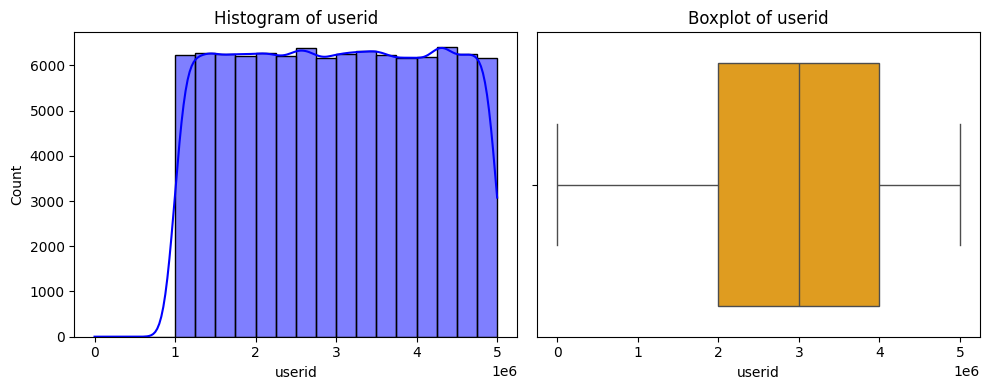

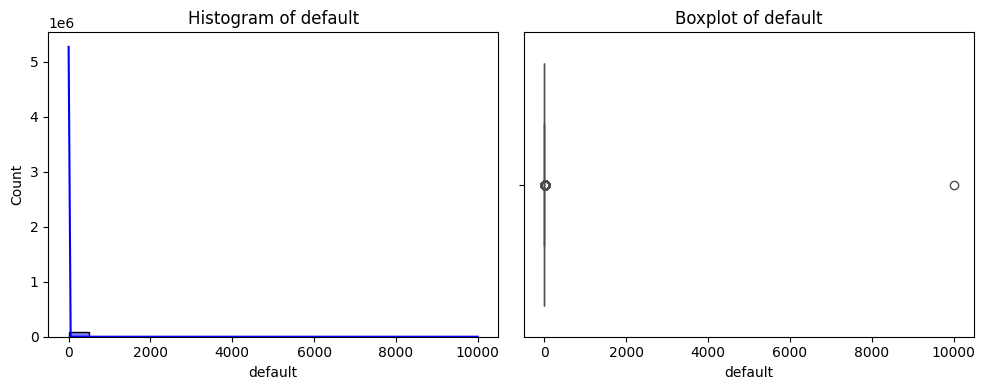

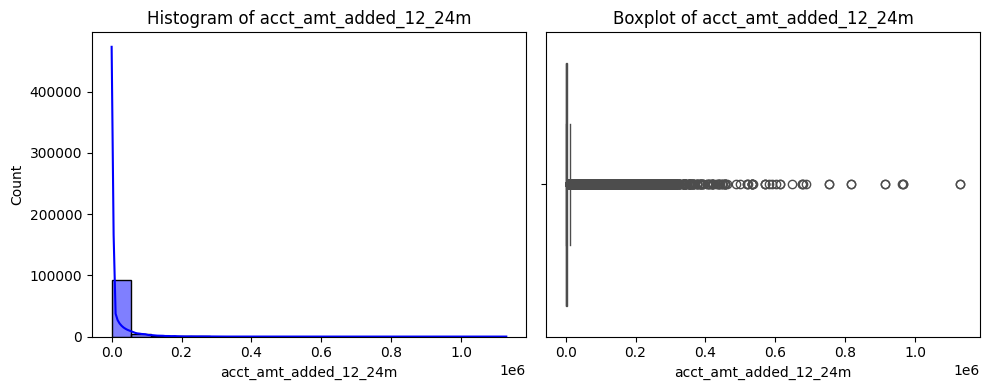

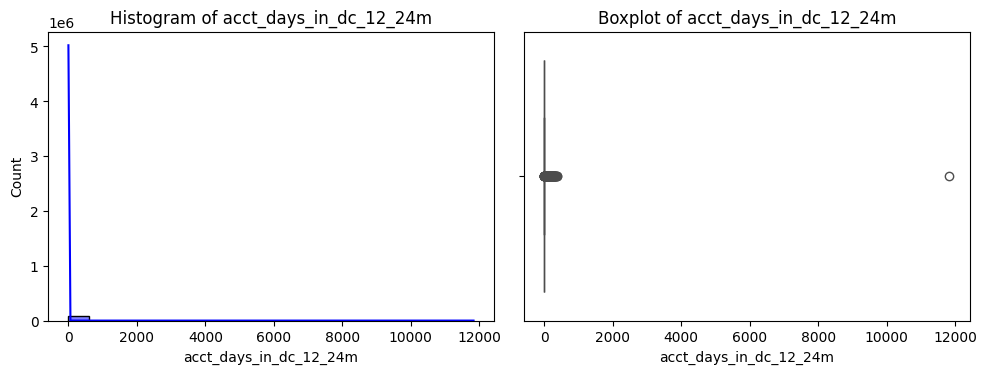

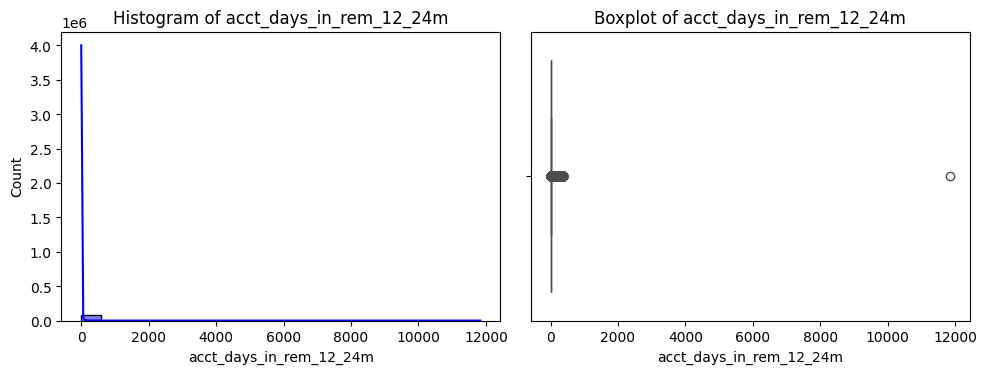

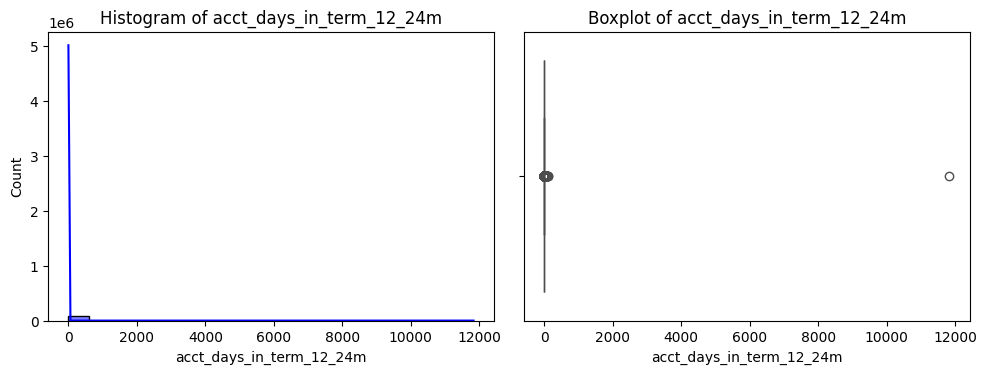

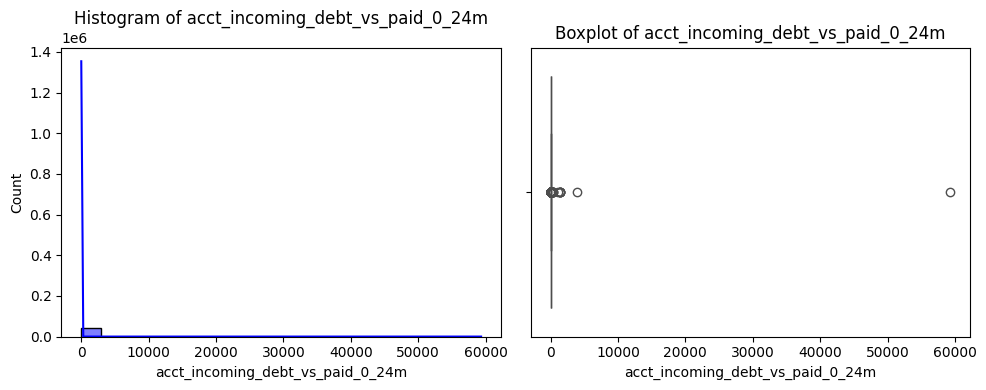

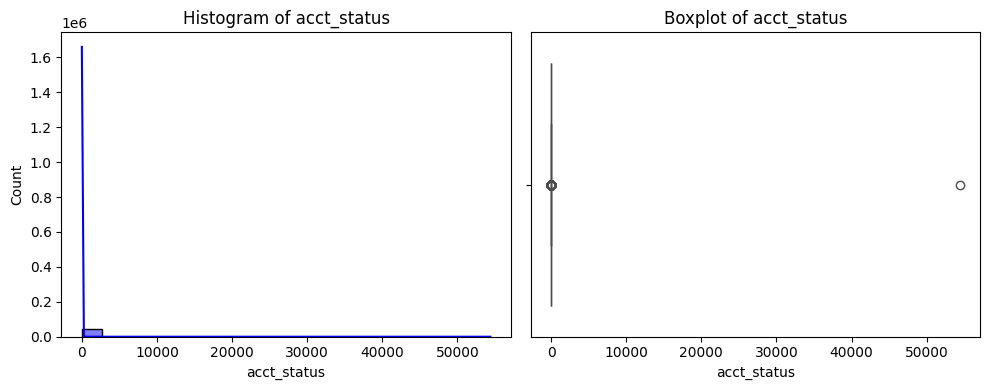

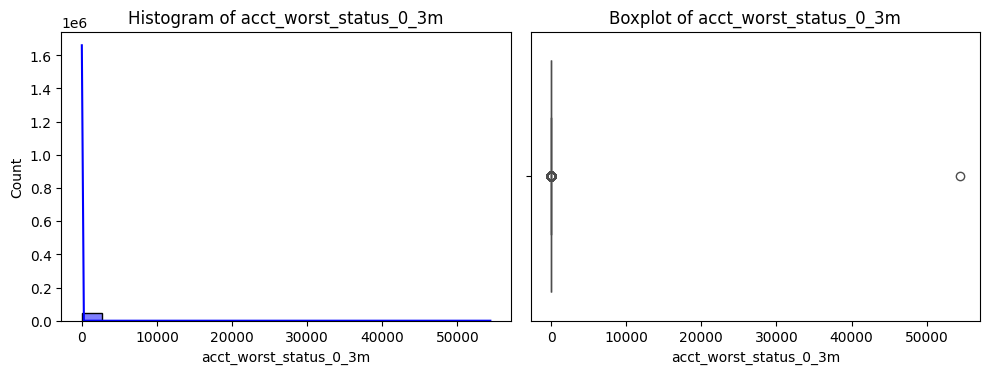

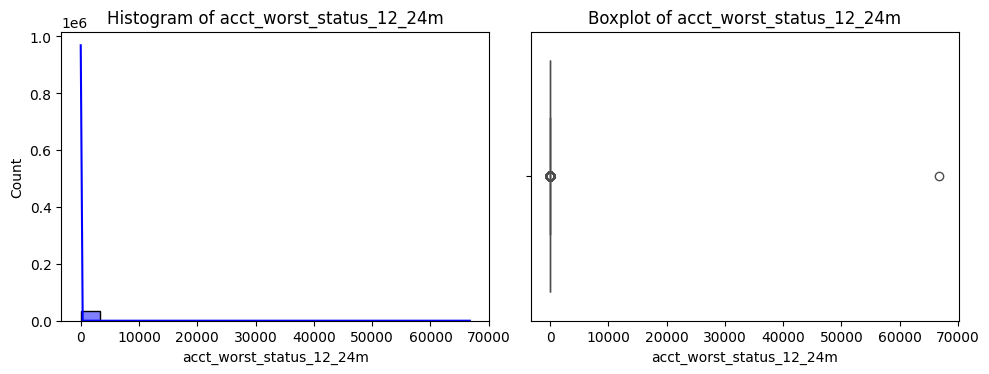

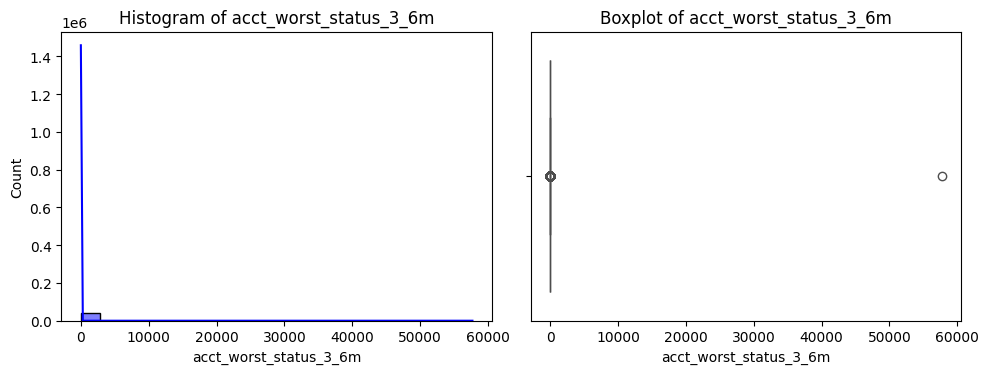

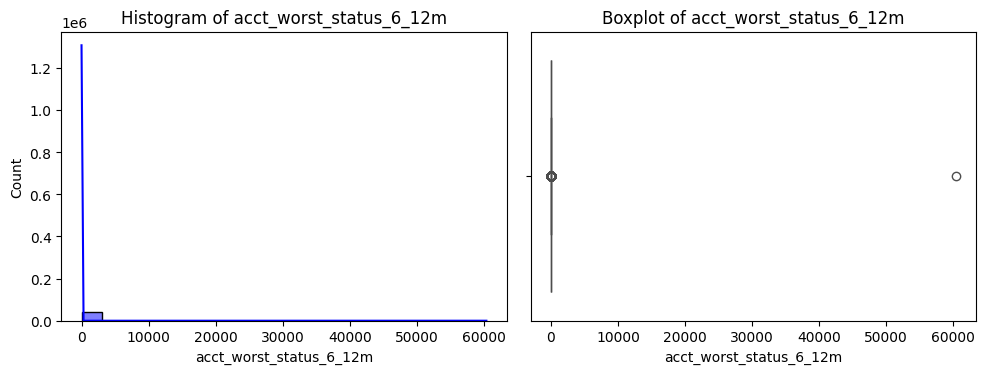

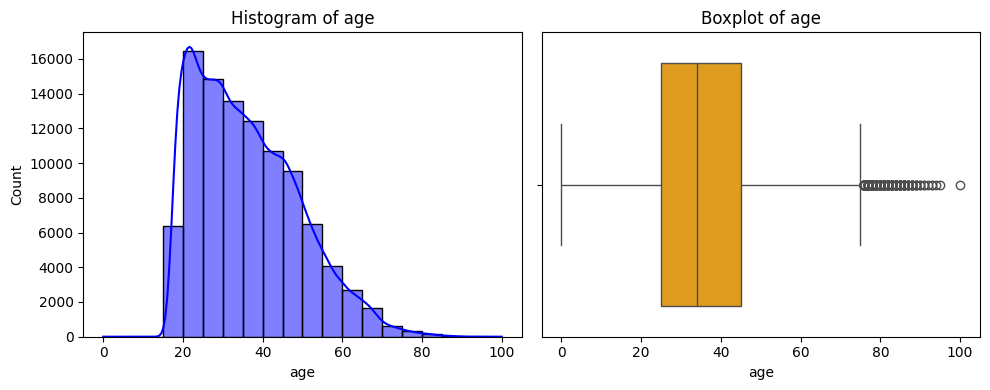

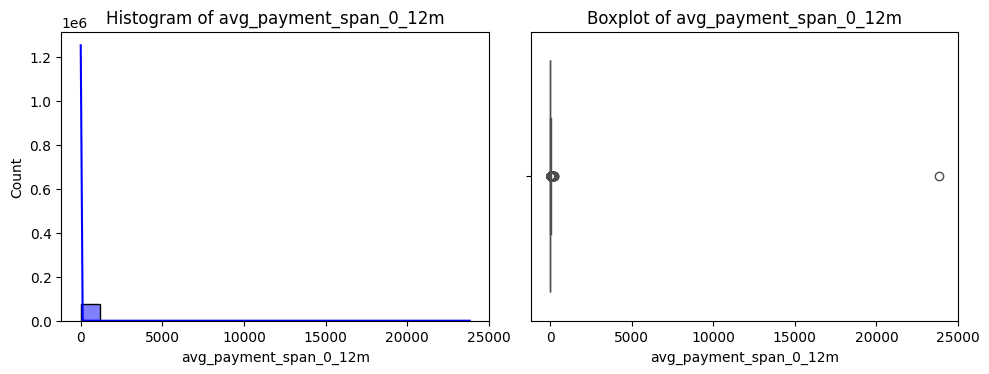

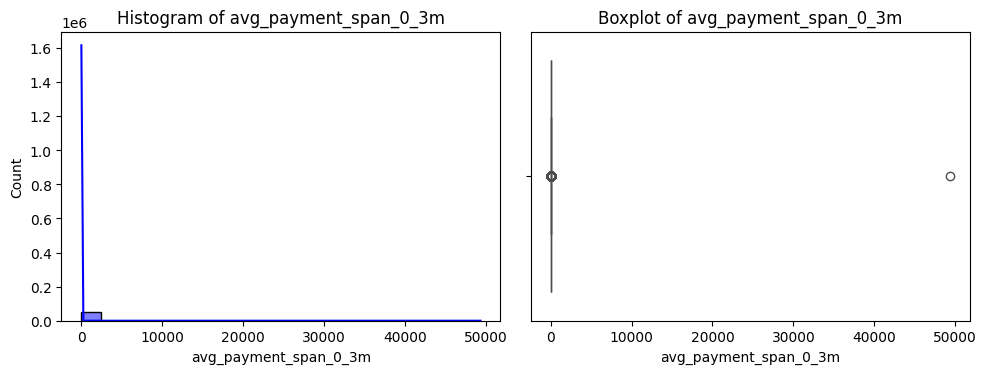

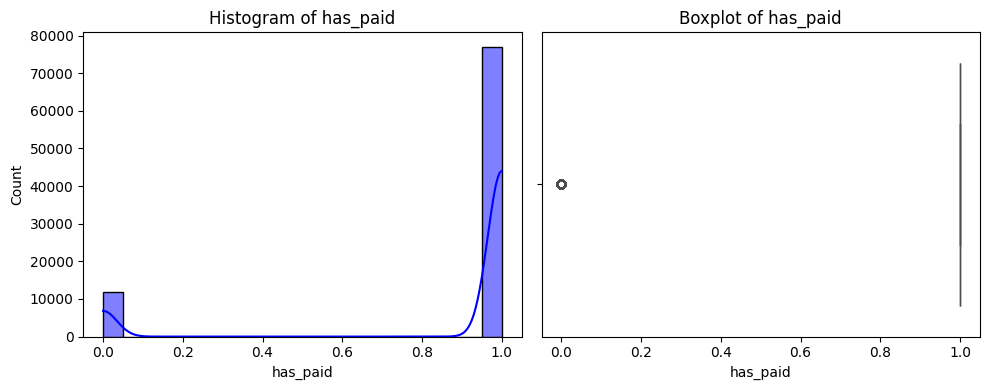

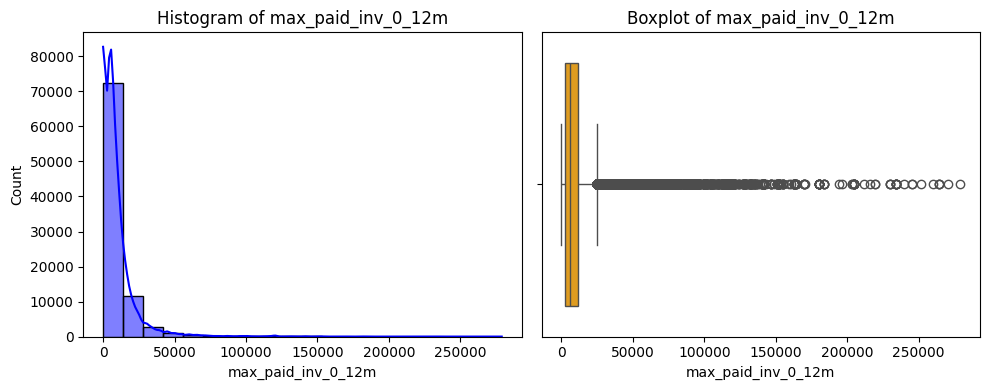

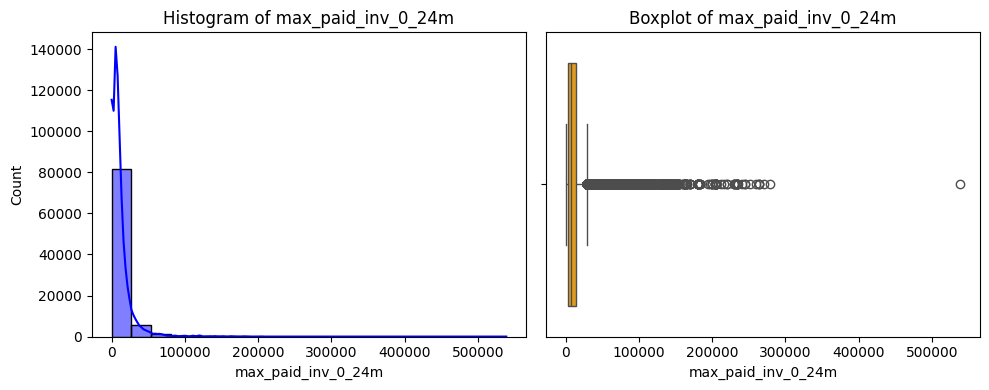

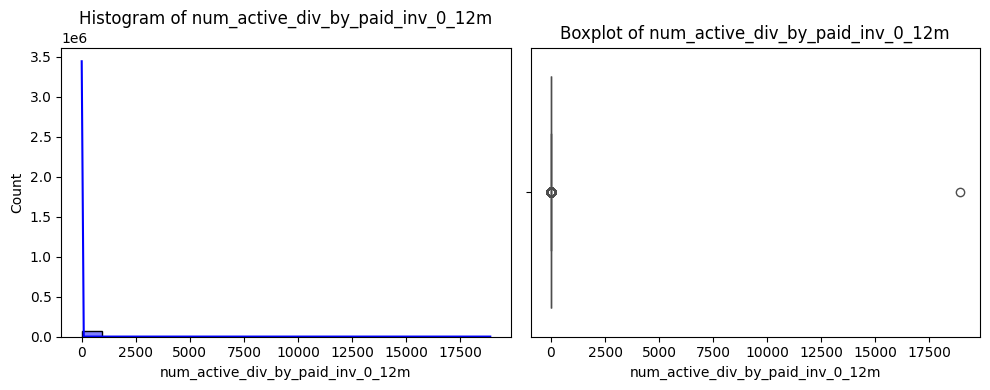

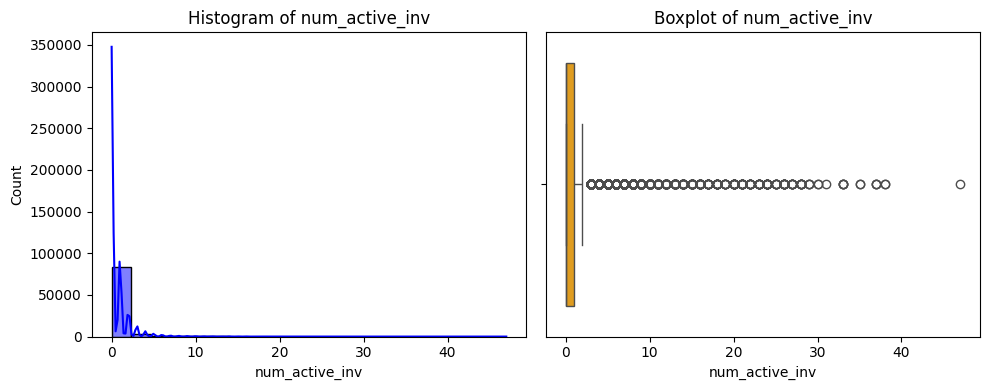

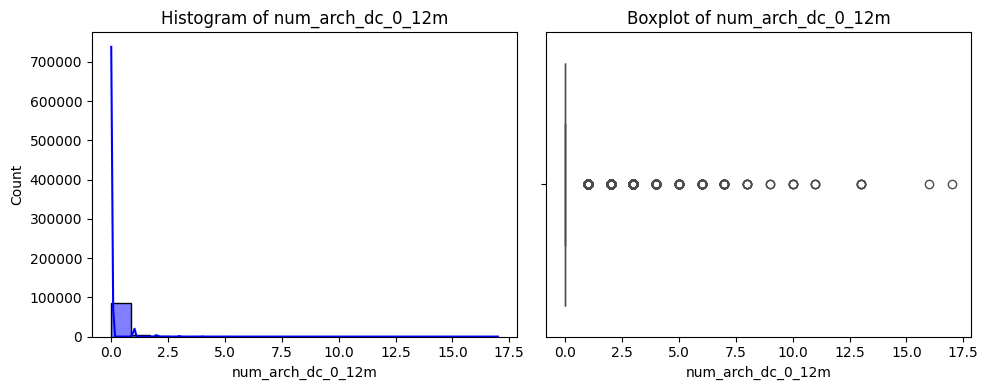

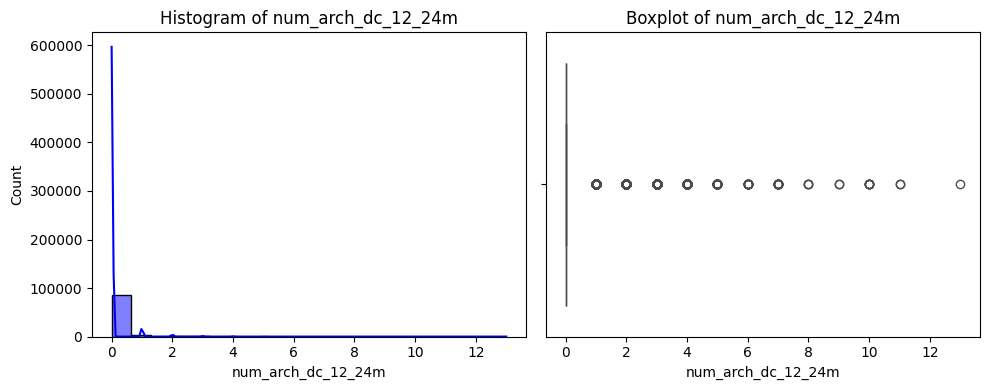

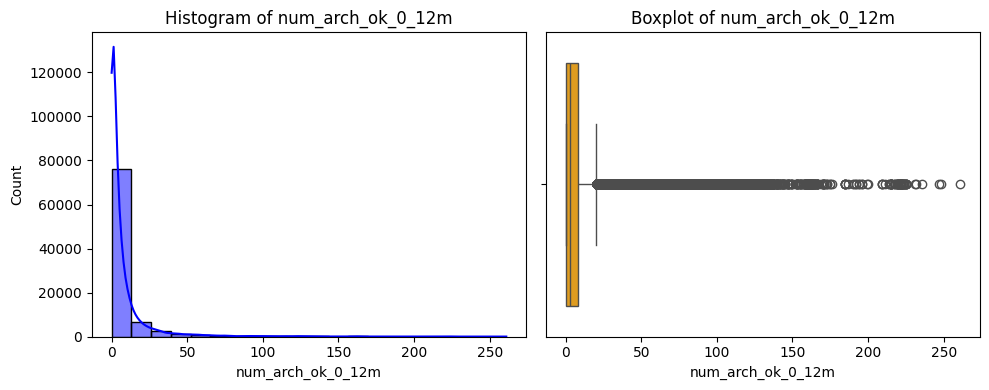

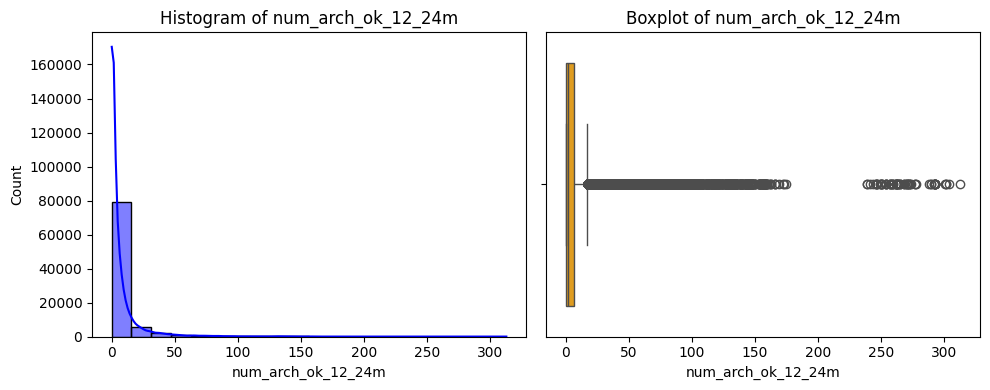

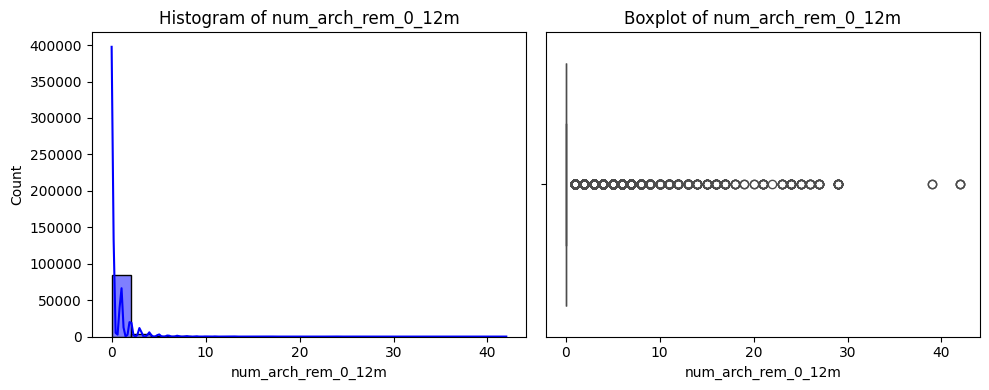

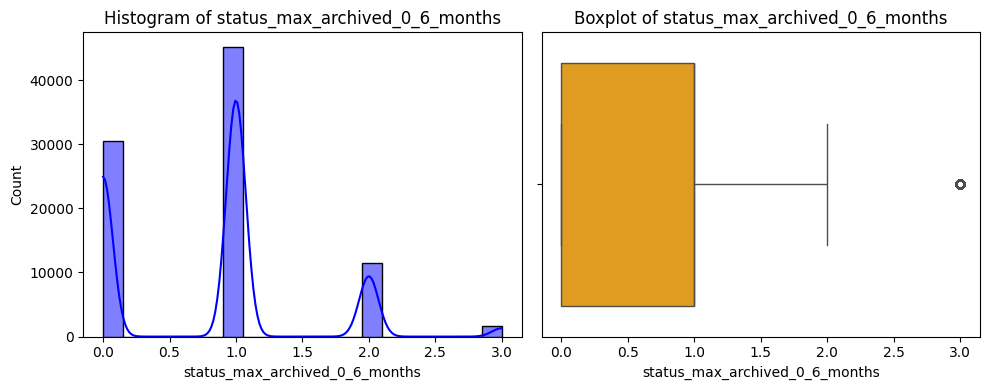

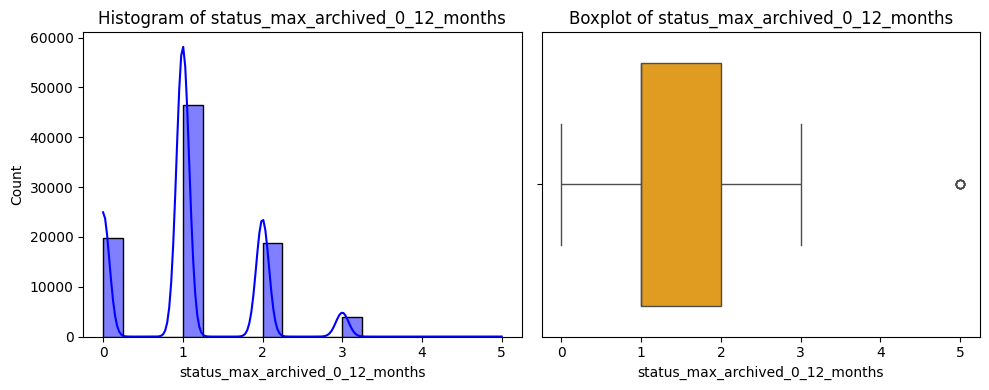

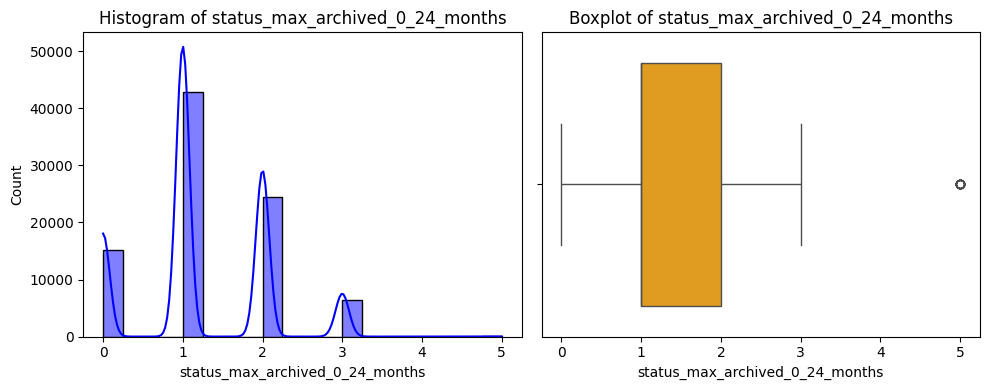

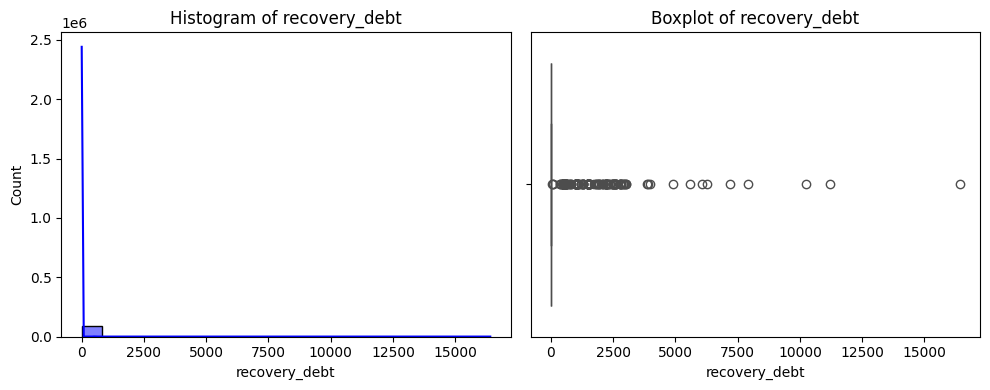

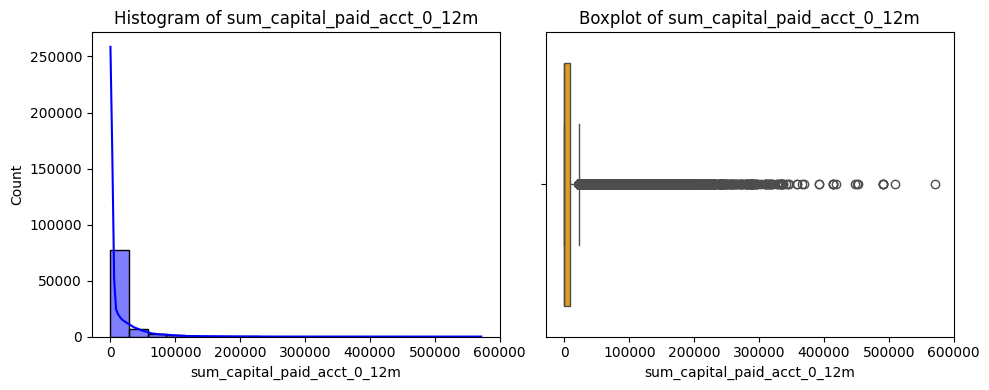

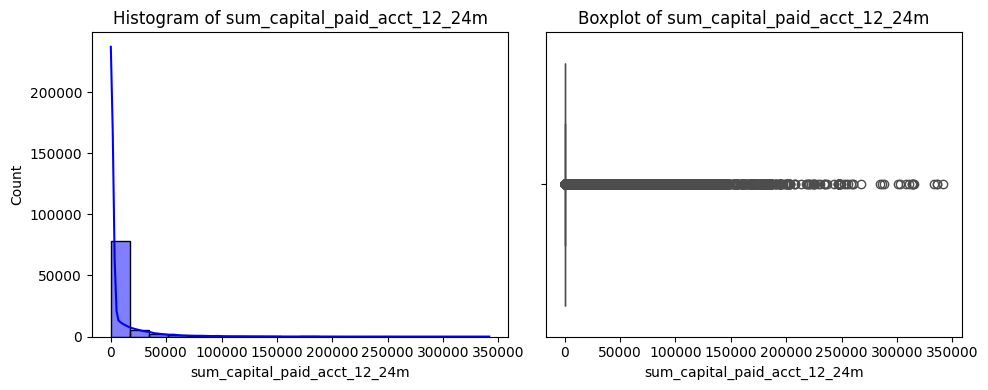

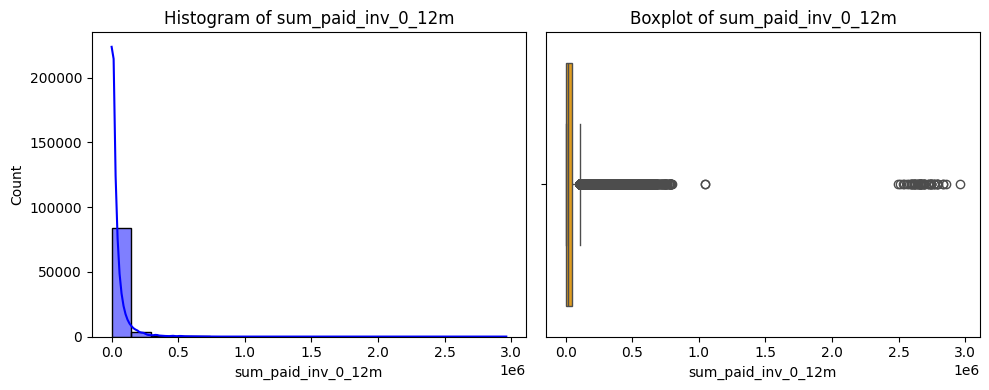

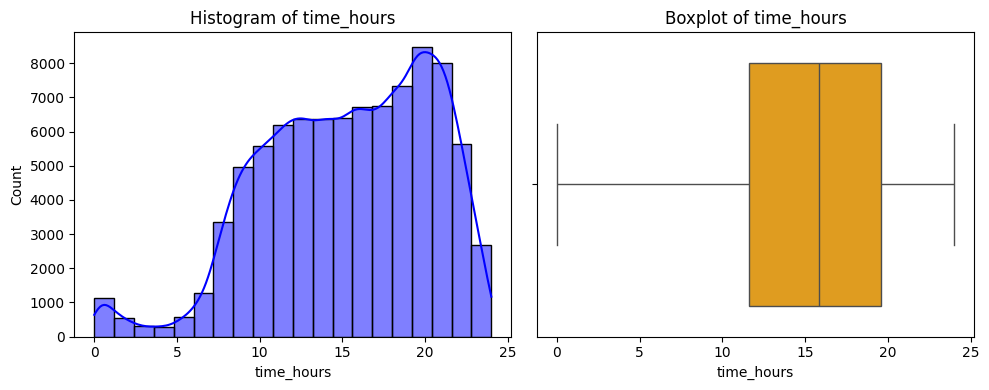

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Univariate Analysis for Numeric Columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

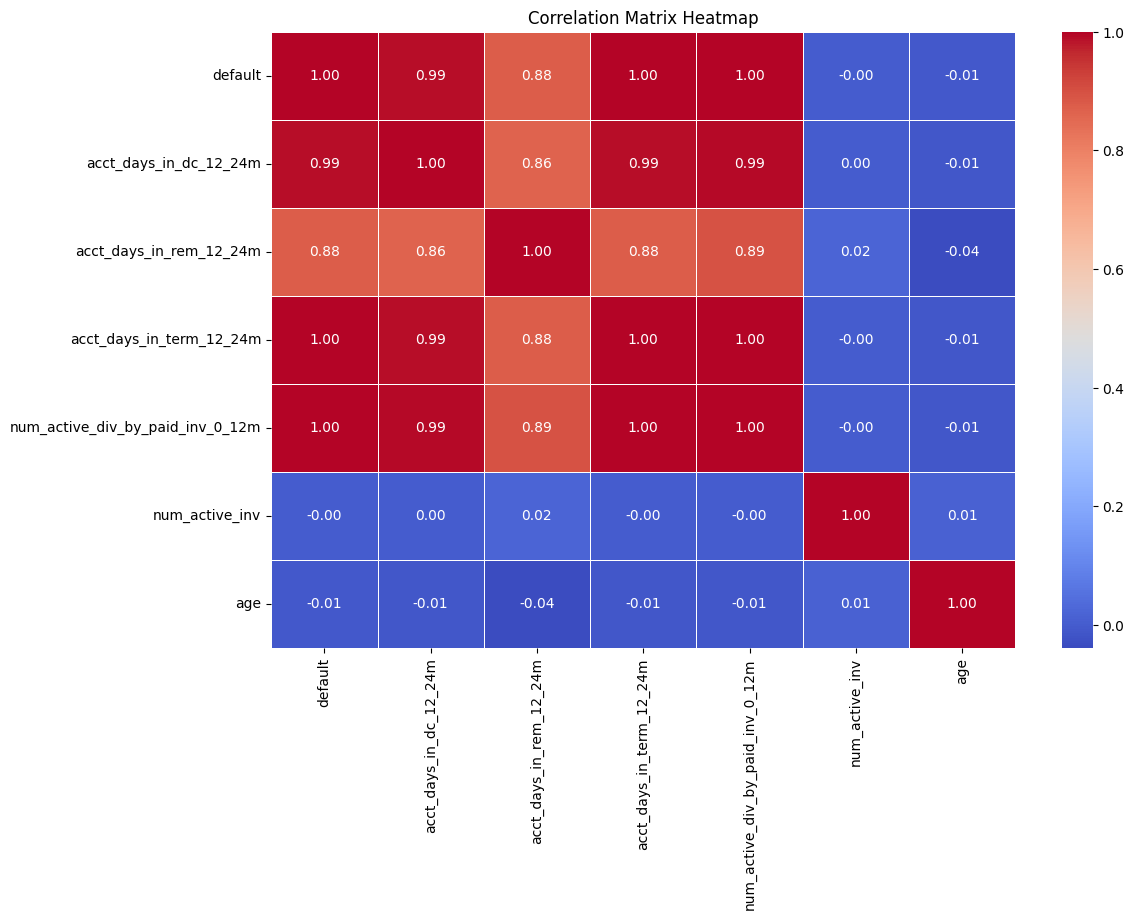

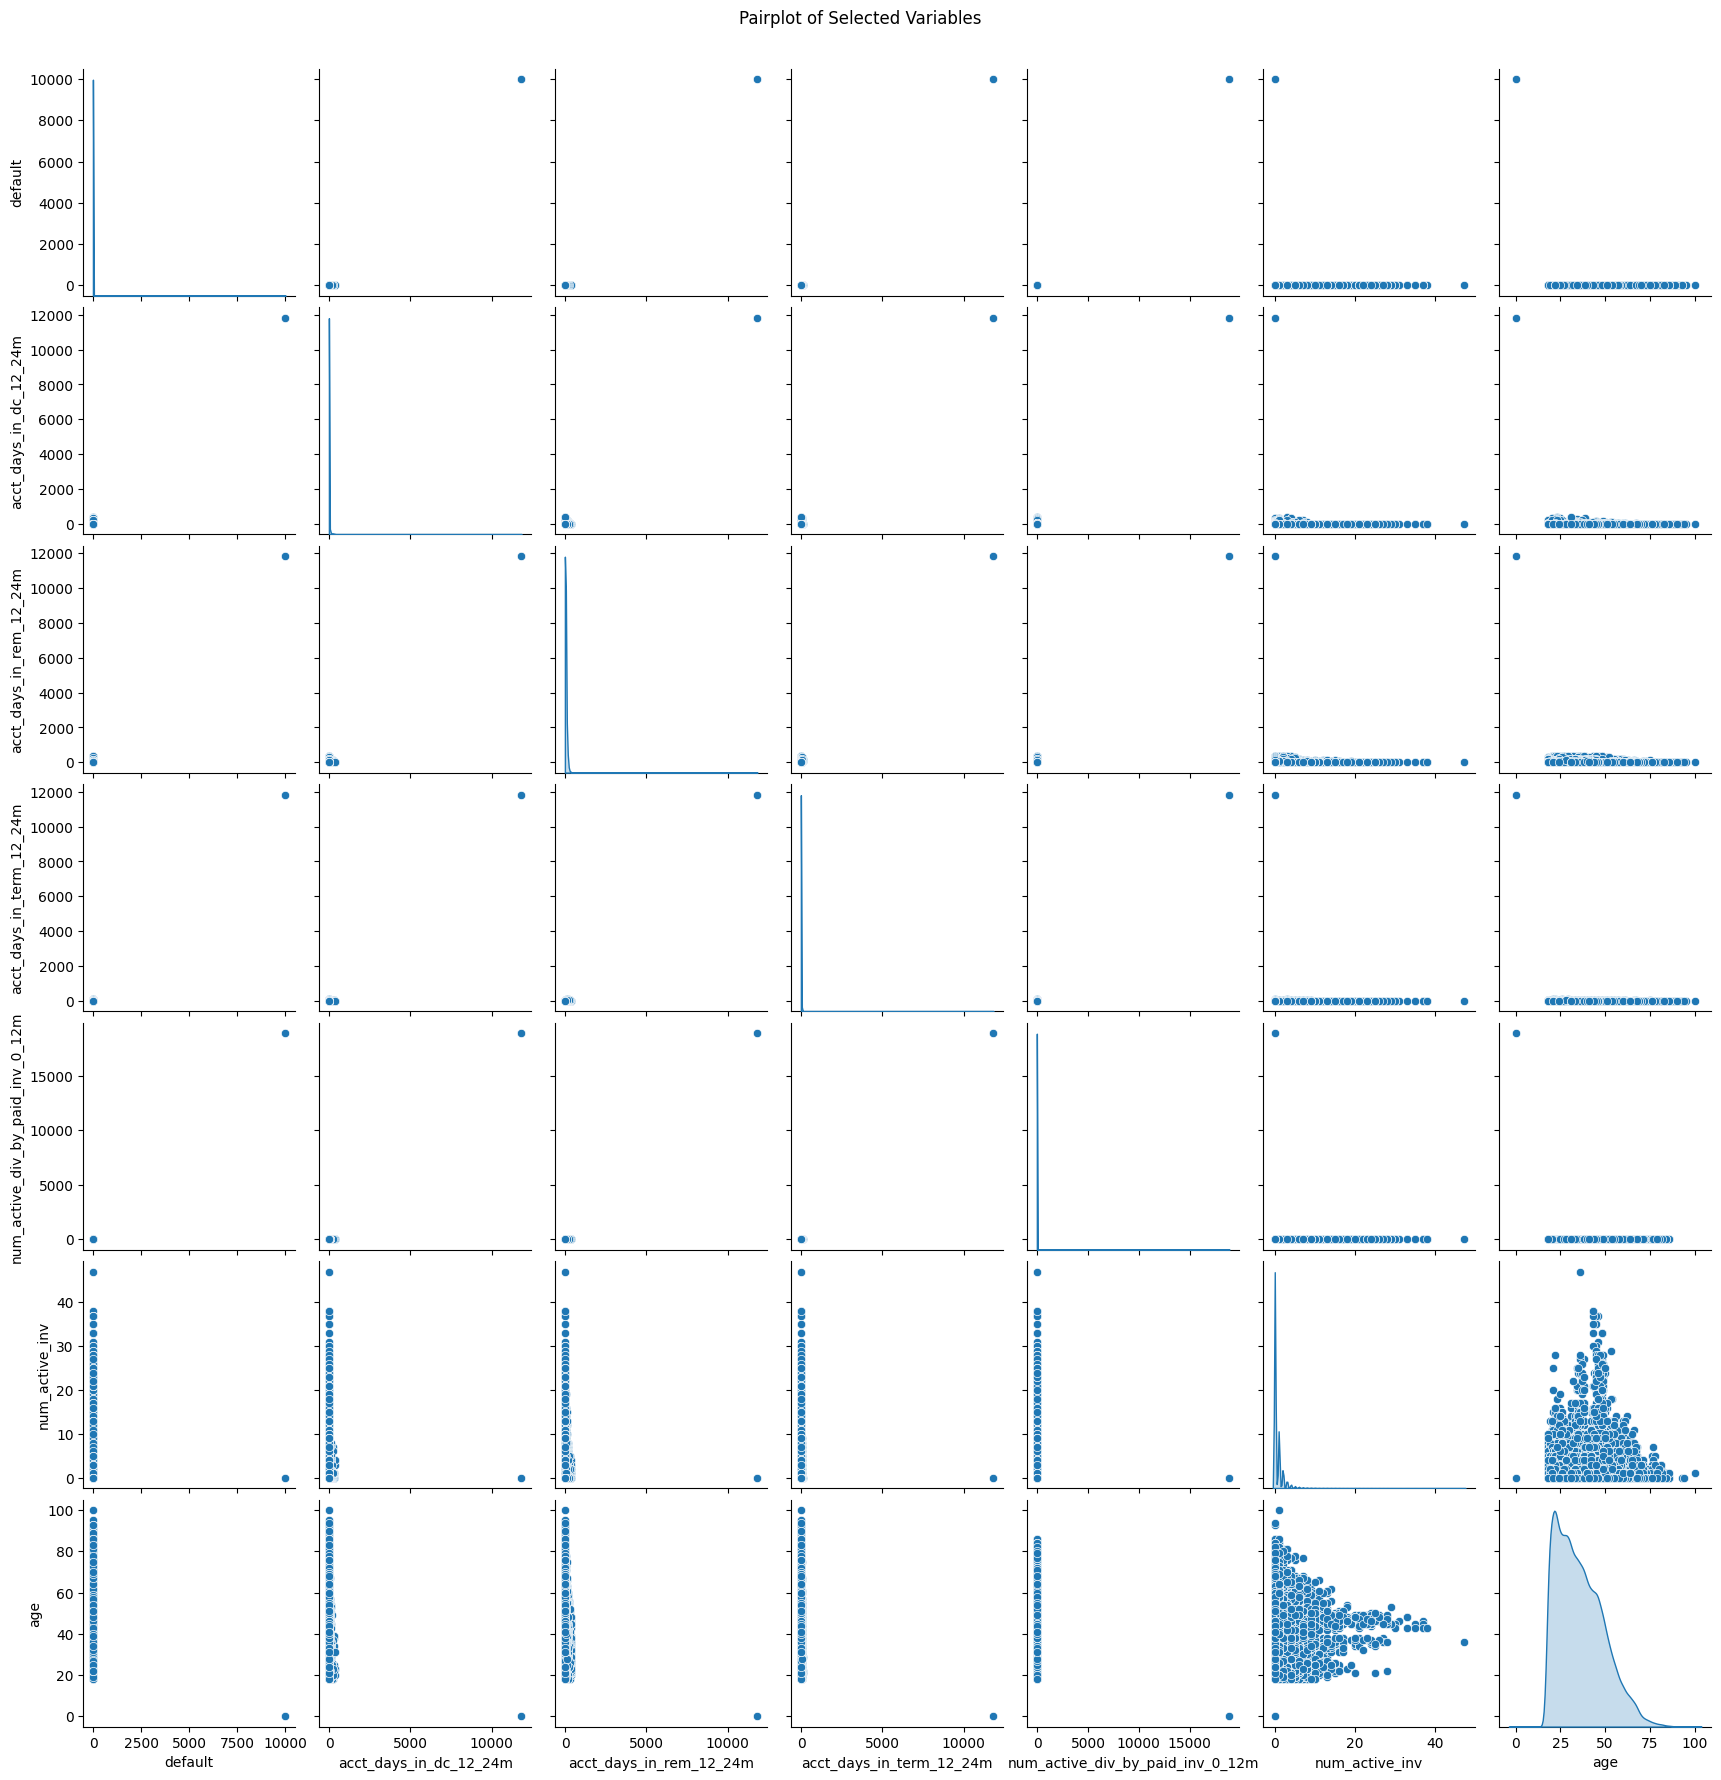

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected columns
selected_columns = ['default', 'acct_days_in_dc_12_24m', 'acct_days_in_rem_12_24m',
                    'acct_days_in_term_12_24m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv','age']

# Ensure these columns exist in the DataFrame
df_selected = df[selected_columns]

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_selected.corr()  # Compute correlation matrix for selected columns
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot for Selected Variables
sns.pairplot(df_selected, diag_kind='kde')
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()


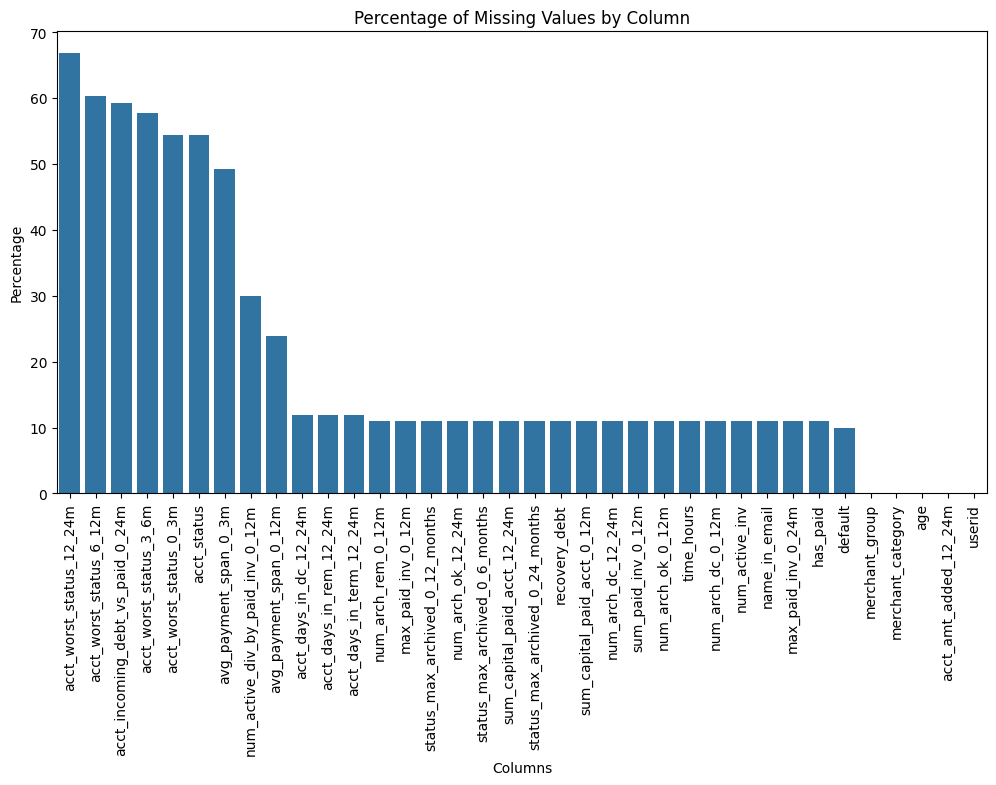

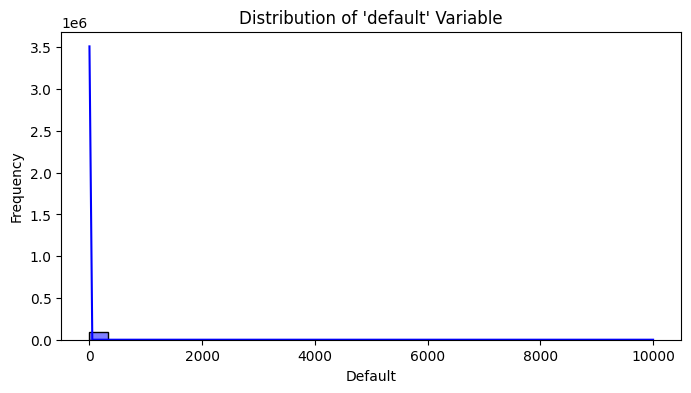

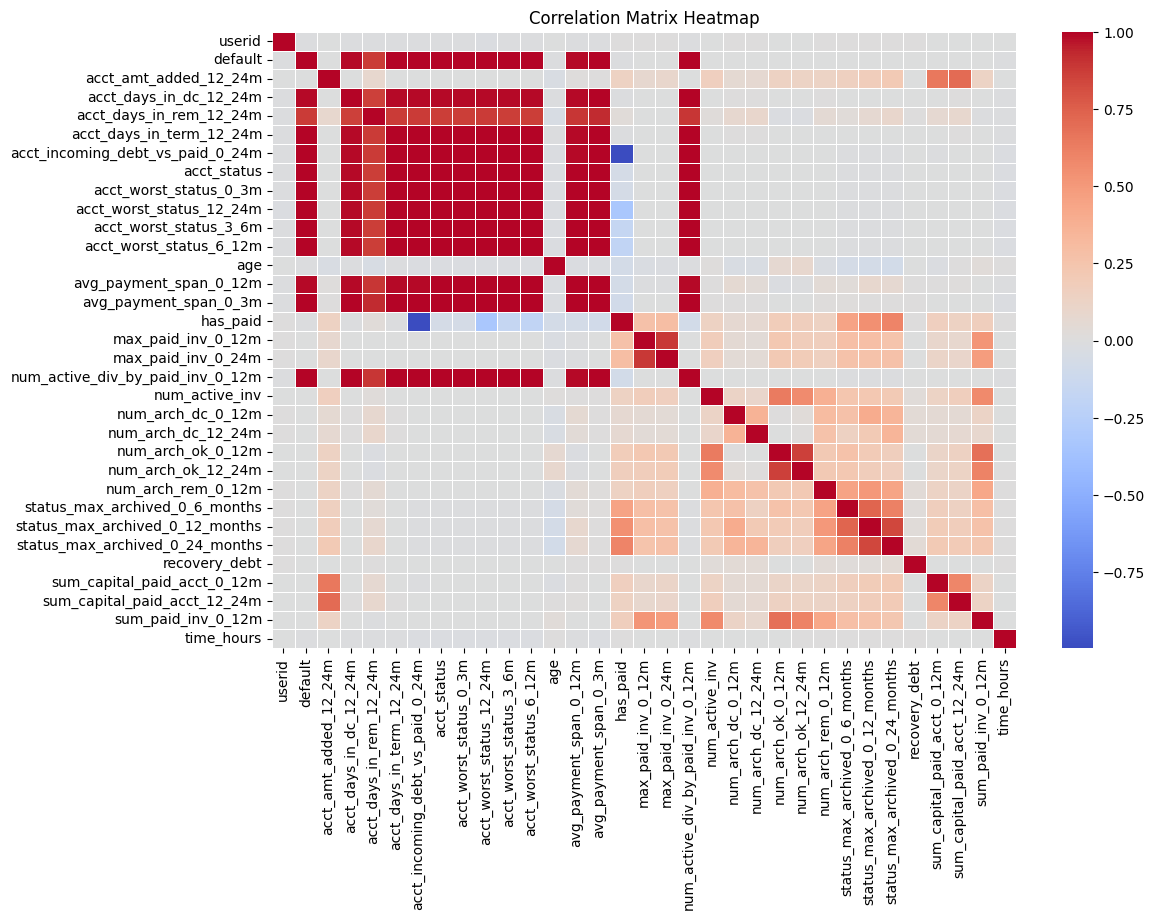

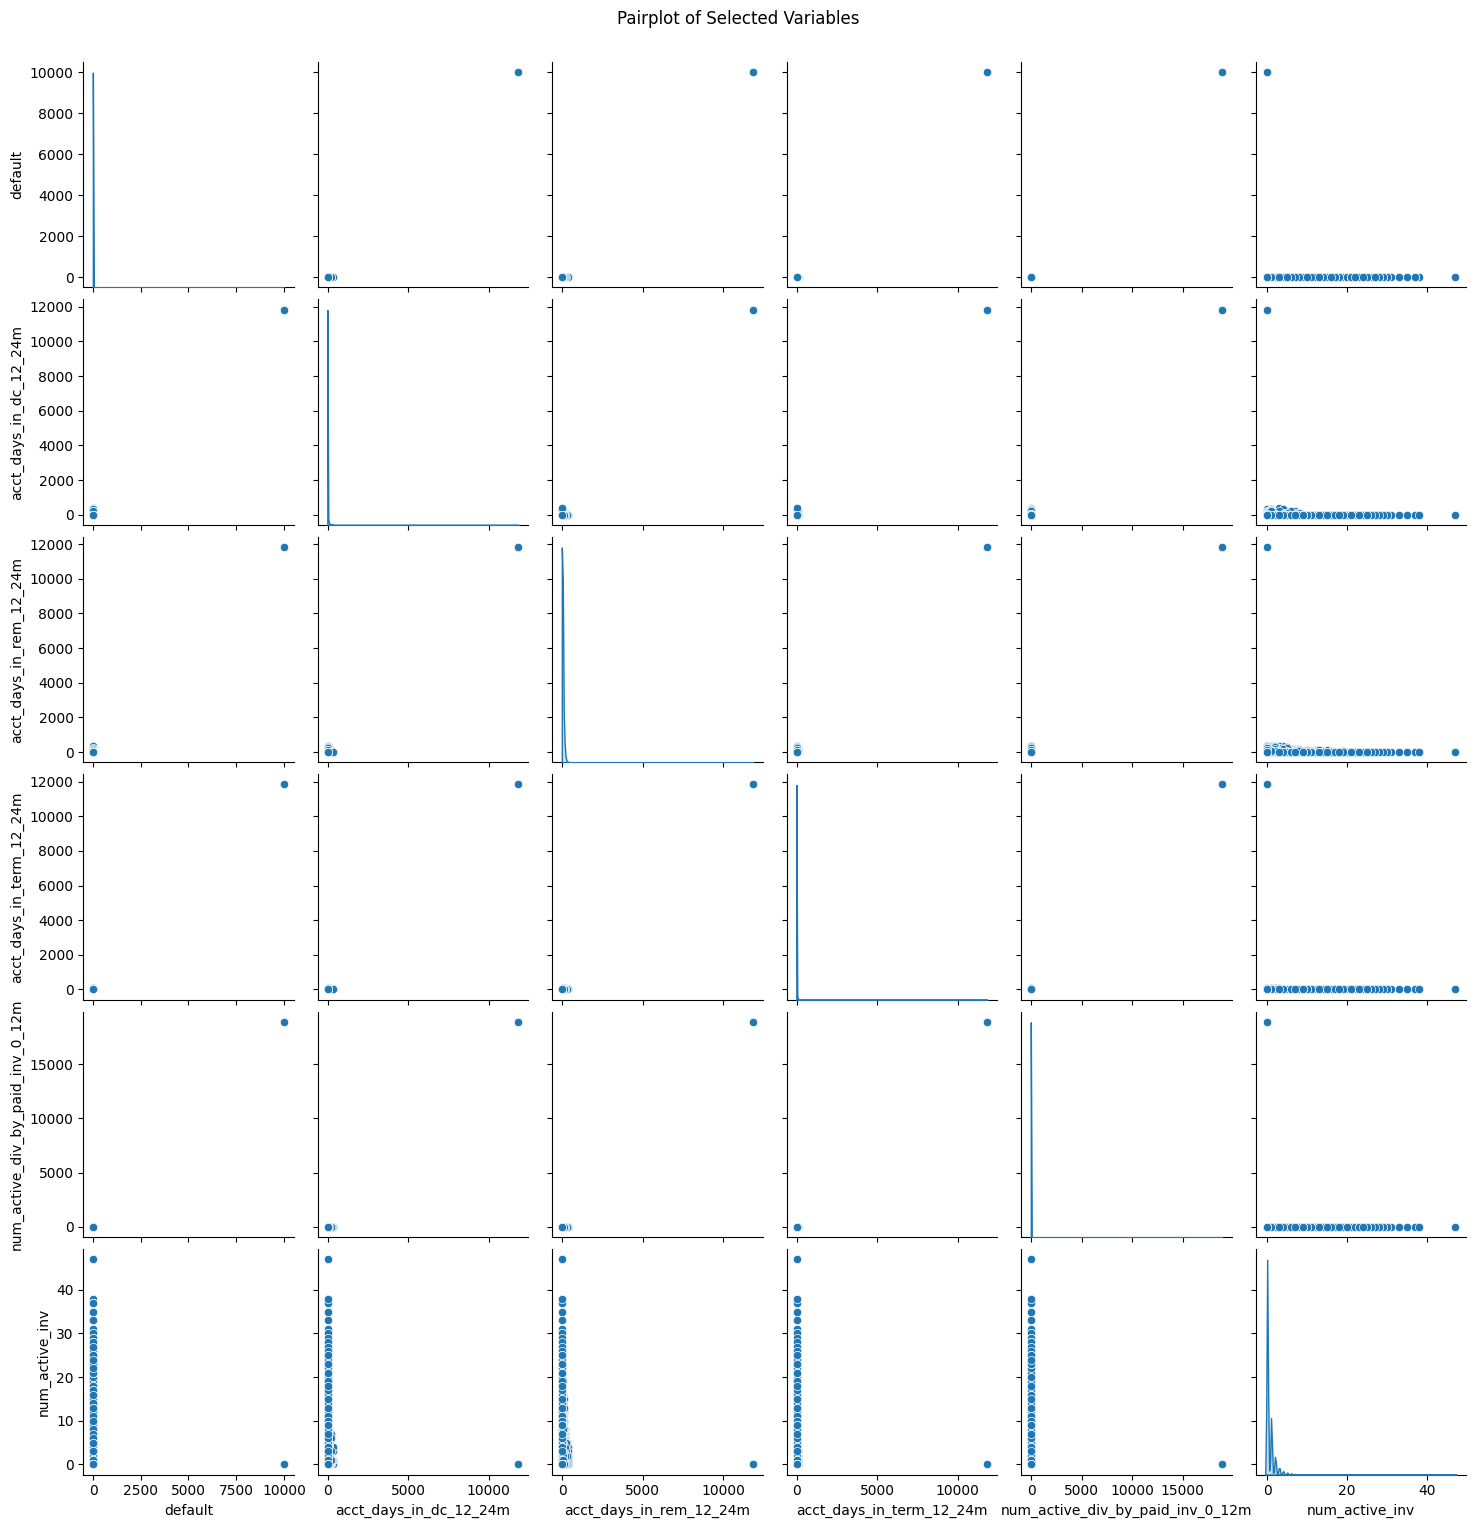

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Data Analysis
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

# Univariate Analysis - Distribution of 'default'
plt.figure(figsize=(8, 4))
sns.histplot(df['default'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of 'default' Variable")
plt.xlabel("Default")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap for Numerical Features
numerical_cols = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot for Key Variables
key_variables = ['default', 'acct_days_in_dc_12_24m', 'acct_days_in_rem_12_24m',
                 'acct_days_in_term_12_24m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv']
df_key_variables = df[key_variables]

# Pairplot for Selected Variables
sns.pairplot(df_key_variables, diag_kind='kde')
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-11-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


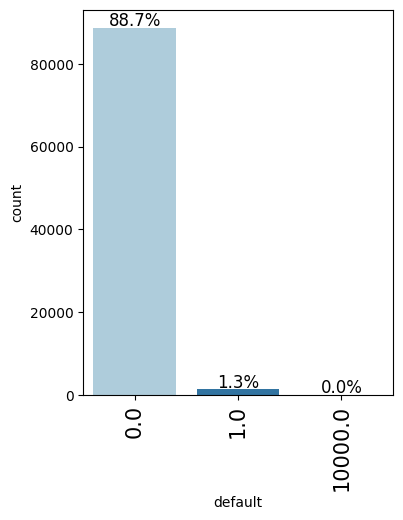

In [12]:
labeled_barplot(df, "default", perc=True)

In [13]:
import pandas as pd

# Assuming df is your original DataFrame
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Apply outlier capping (example: capping at 1.5 * IQR)
df_capped = df.copy()  # Make a copy of the original dataframe

# Capping outliers by limiting values within the acceptable range
for col in numeric_df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

# Now df_capped has capped outliers


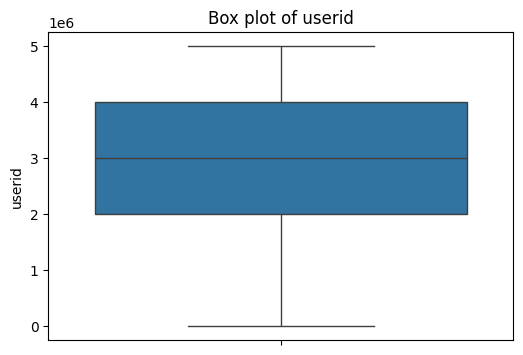

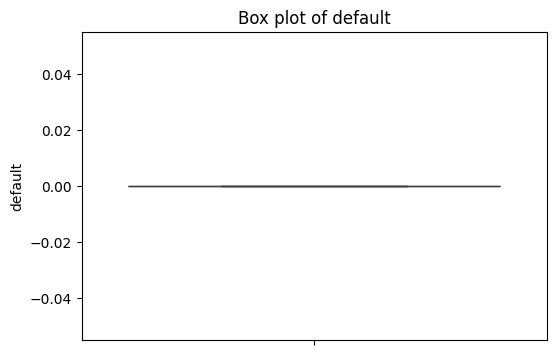

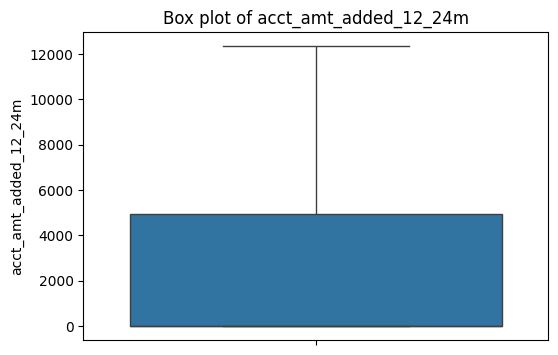

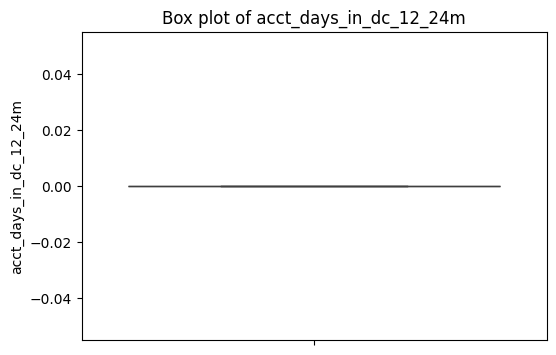

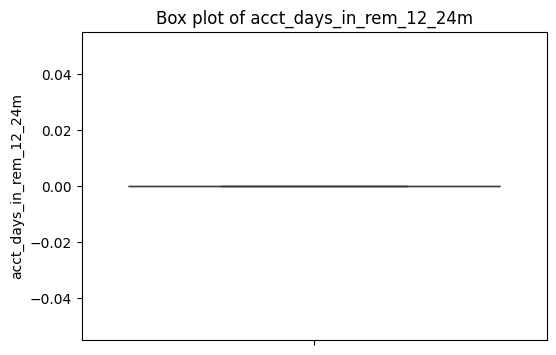

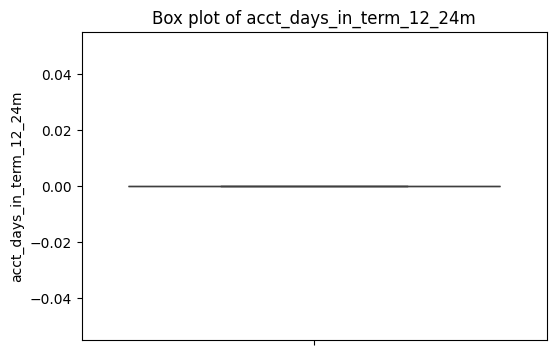

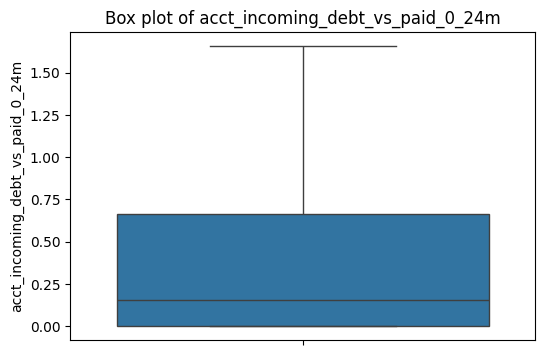

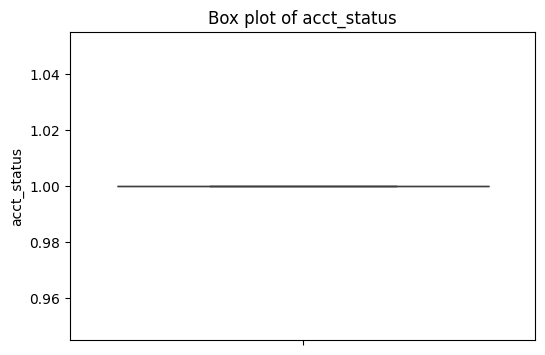

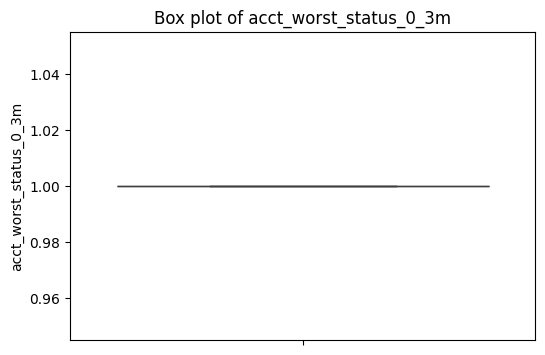

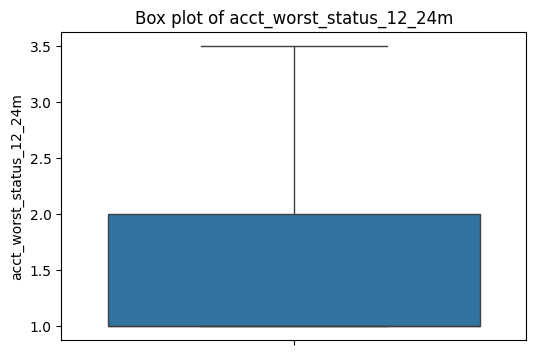

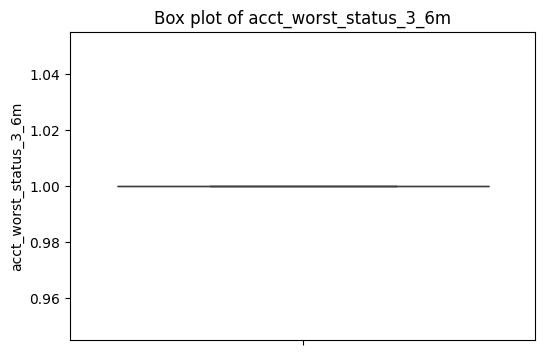

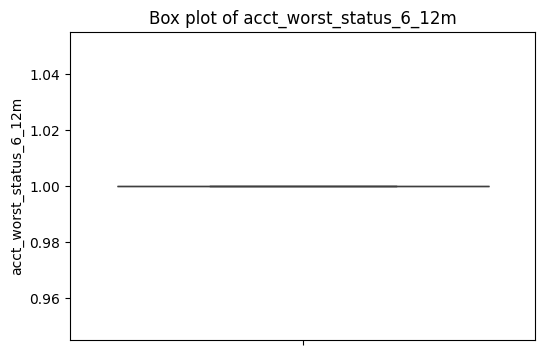

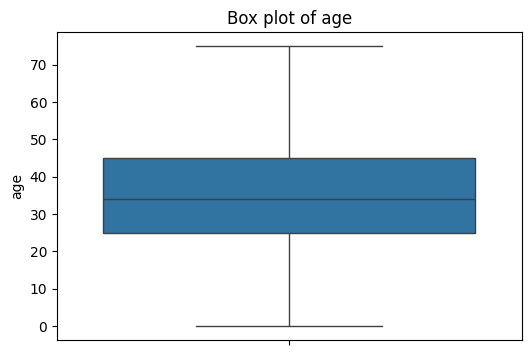

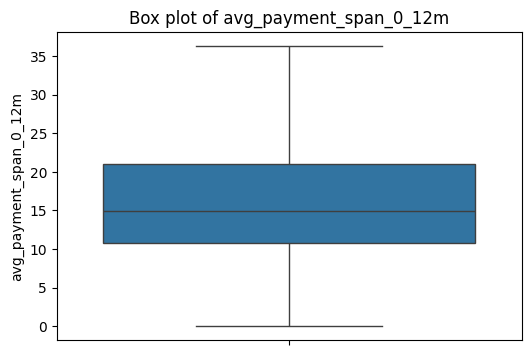

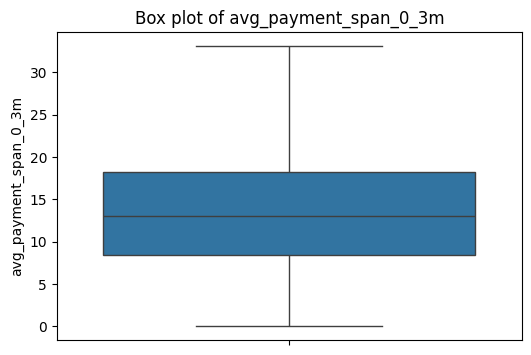

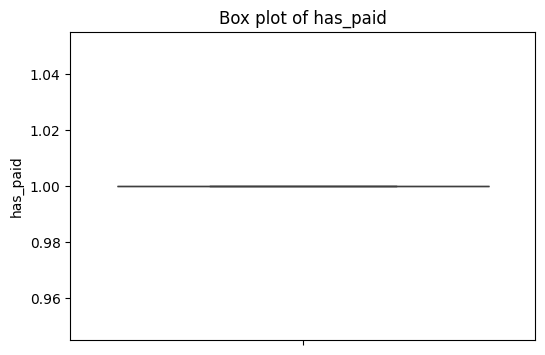

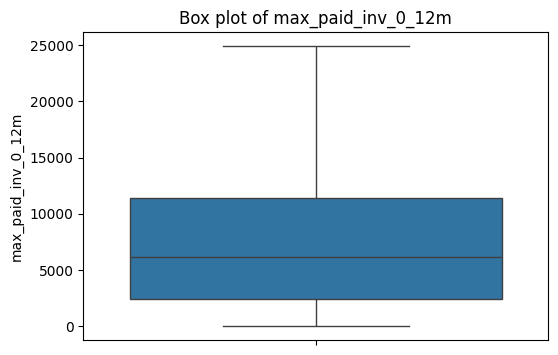

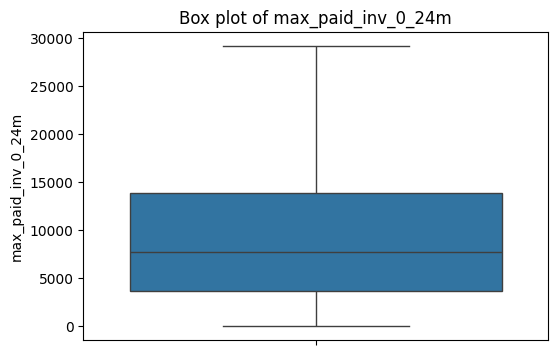

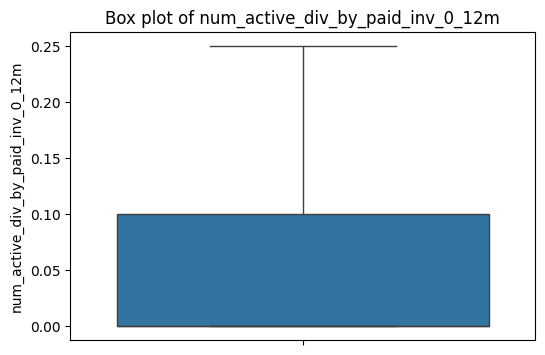

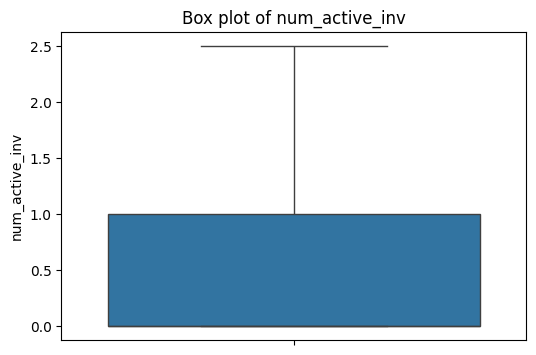

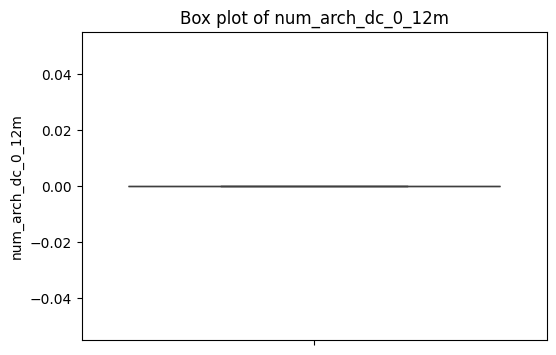

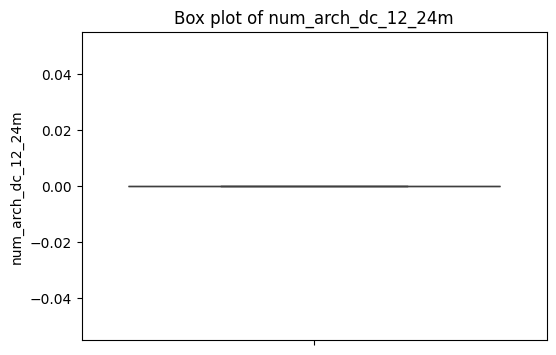

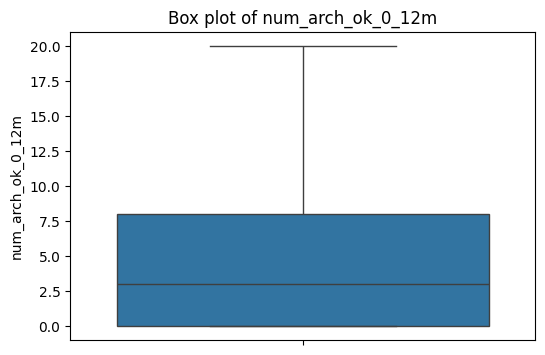

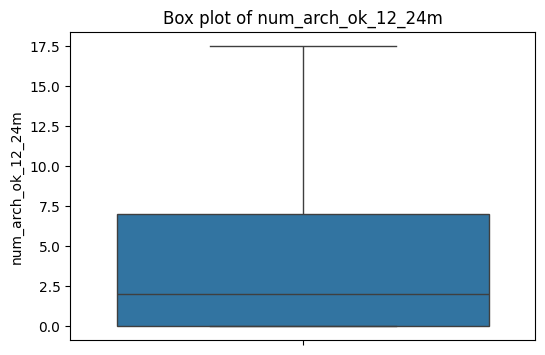

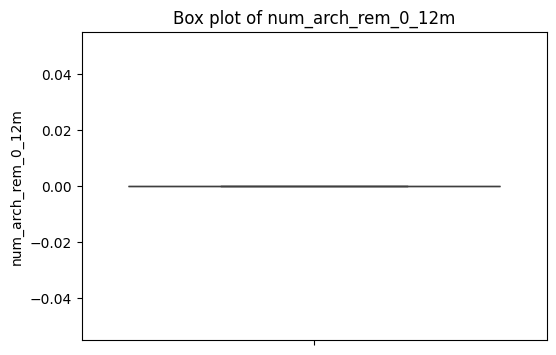

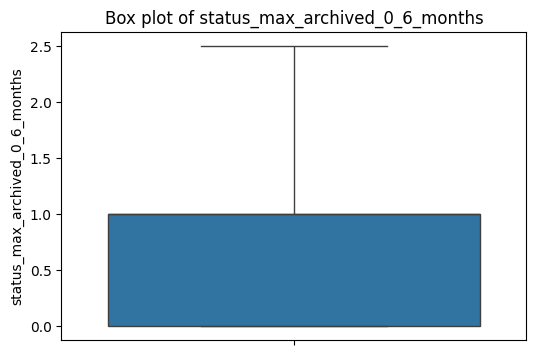

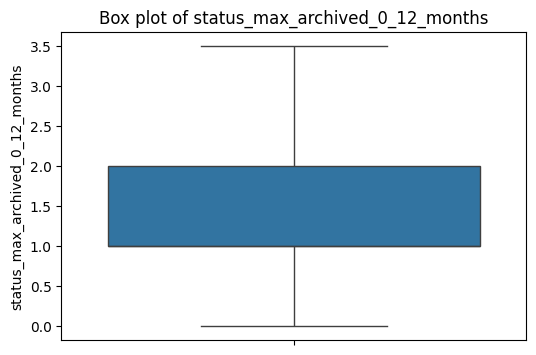

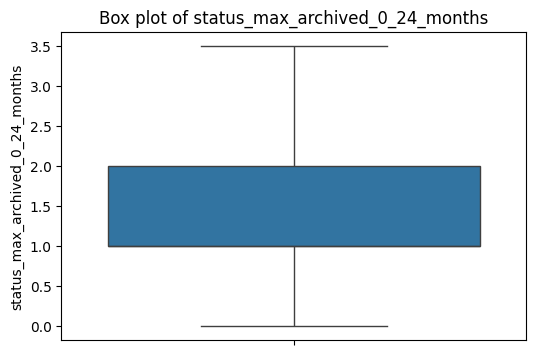

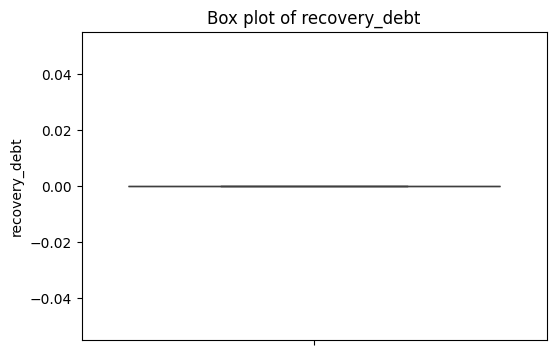

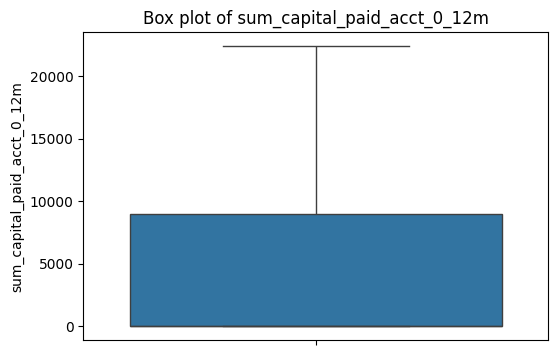

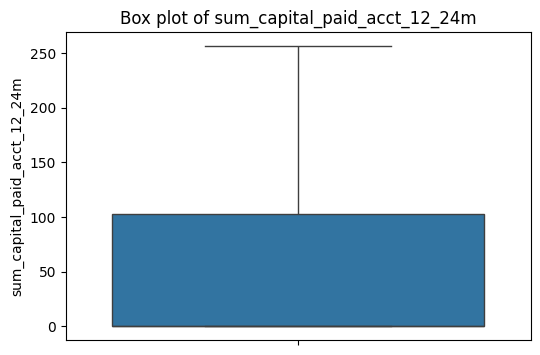

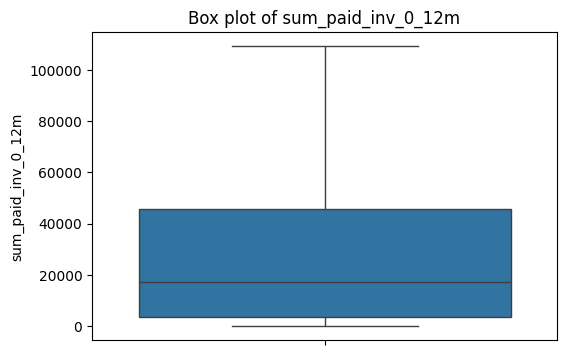

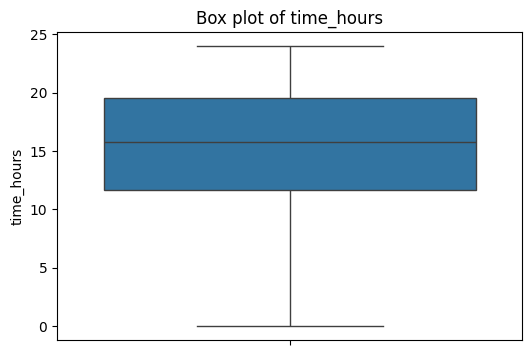

In [14]:
for column in df_capped.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_capped[column])
    plt.title(f'Box plot of {column}')
    plt.show()

<ipython-input-15-3c5bf772822b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='age', data=df, palette='coolwarm')


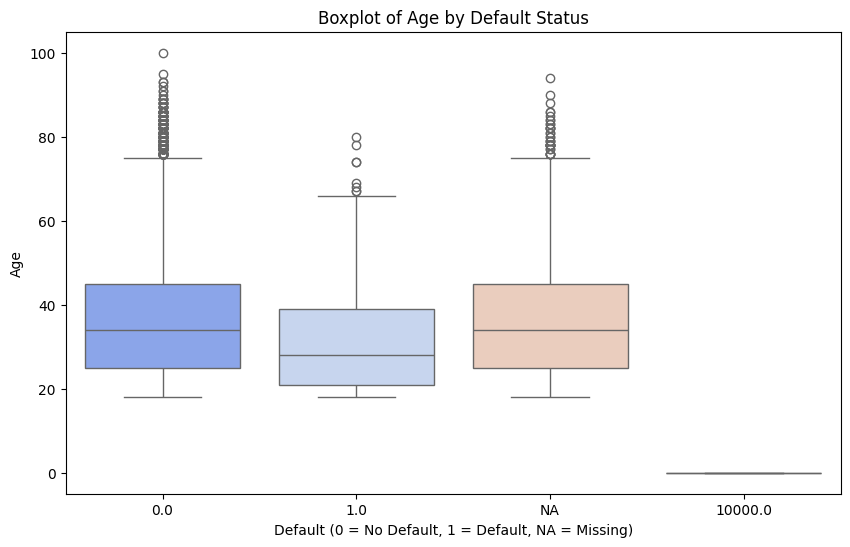

<ipython-input-15-3c5bf772822b>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-3c5bf772822b>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-3c5bf772822b>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-3c5bf772822b>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-3c5bf772822b>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


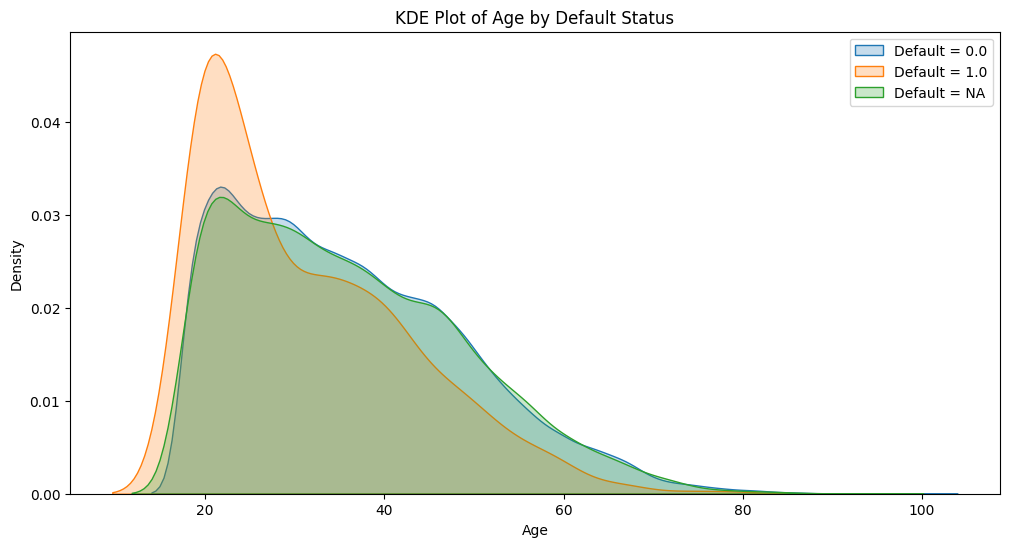

(age            2
 default    10002
 dtype: int64,
            count       mean        std   min   25%   50%   75%    max
 default                                                              
 0.0      88688.0  36.087554  13.005620  18.0  25.0  34.0  45.0  100.0
 1.0       1288.0  31.302019  11.659622  18.0  21.0  28.0  39.0   80.0
 10000.0      1.0   0.000000        NaN   0.0   0.0   0.0   0.0    0.0
 NA       10000.0  35.991400  13.016254  18.0  25.0  34.0  45.0   94.0)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in 'age' or 'default'
missing_age_default = df[['age', 'default']].isnull().sum()

# Replace missing values in 'default' with a placeholder (e.g., 'NA')
df['default'] = df['default'].fillna('NA')

# Boxplot to visualize distribution of 'age' by 'default'
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='age', data=df, palette='coolwarm')
plt.title("Boxplot of Age by Default Status")
plt.xlabel("Default (0 = No Default, 1 = Default, NA = Missing)")
plt.ylabel("Age")
plt.show()

# KDE plot for age distribution by default status
plt.figure(figsize=(12, 6))
for category in df['default'].unique():
    sns.kdeplot(
        data=df[df['default'] == category]['age'],
        label=f"Default = {category}",
        shade=True
    )
plt.title("KDE Plot of Age by Default Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

# Summary statistics of 'age' by 'default'
age_default_summary = df.groupby('default')['age'].describe()

# Display missing value summary and statistics
missing_age_default, age_default_summary


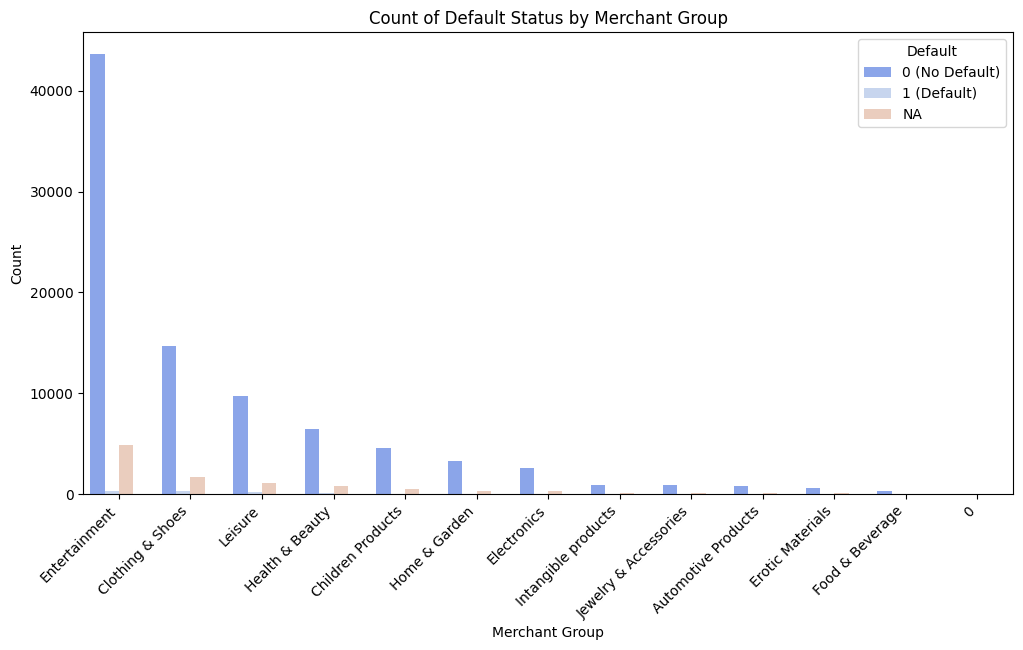

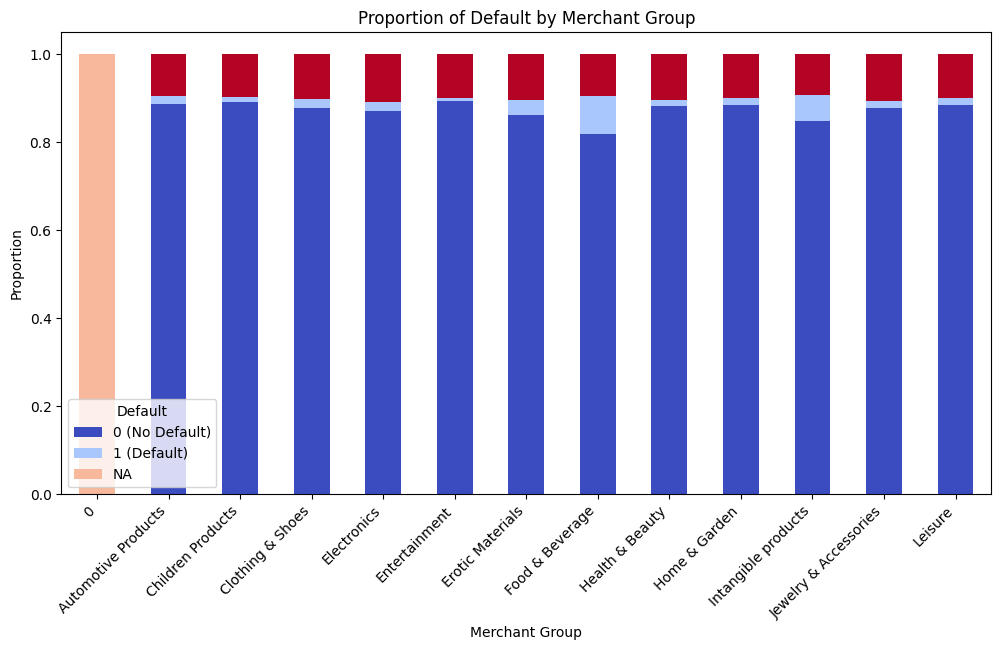

default,0.0,1.0,10000.0,NA
merchant_group,,,,
0,0.000000,0.000000,1.0,0.000000
Automotive Products,0.886873,0.018143,0.0,0.094984
Children Products,0.891934,0.011355,0.0,0.096711
Clothing & Shoes,0.878288,0.020385,0.0,0.101327
Electronics,0.870468,0.020765,0.0,0.108767
Entertainment,0.894114,0.006683,0.0,0.099203
Erotic Materials,0.862115,0.034806,0.0,0.103079
Food & Beverage,0.819718,0.084507,0.0,0.095775
Health & Beauty,0.881593,0.014138,0.0,0.104269


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot to visualize the frequency of default by merchant group
plt.figure(figsize=(12, 6))
sns.countplot(x='merchant_group', hue='default', data=df, palette='coolwarm', order=df['merchant_group'].value_counts().index)
plt.title("Count of Default Status by Merchant Group")
plt.xlabel("Merchant Group")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Default', labels=['0 (No Default)', '1 (Default)', 'NA'])
plt.show()

# Calculate proportion of default by merchant group
merchant_group_default = df.groupby('merchant_group')['default'].value_counts(normalize=True).unstack().fillna(0)

# Bar plot for proportion of default by merchant group
merchant_group_default.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='coolwarm')
plt.title("Proportion of Default by Merchant Group")
plt.xlabel("Merchant Group")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Default', labels=['0 (No Default)', '1 (Default)', 'NA'])
plt.show()

# Display the calculated proportions
merchant_group_default


<ipython-input-11-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


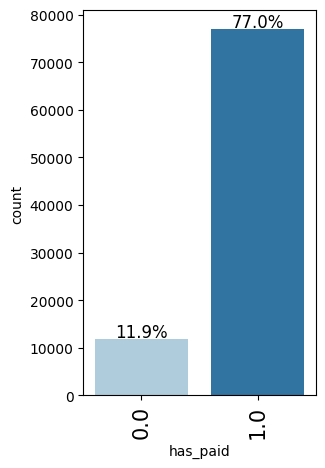

In [17]:
labeled_barplot(df, "has_paid", perc=True)

In [18]:
from imblearn.over_sampling import SMOTE

# Step 1: Handle missing values
# Treat 'default' variable: Replace 'NA' with a separate category or remove rows with NA
df['default'] = df['default'].replace('NA', np.nan)  # Replace 'NA' with NaN for easy handling
df = df.dropna(subset=['default'])  # Drop rows where 'default' is NaN

# Step 2: Define Features (X) and Target (y)
X = df.drop(columns=['userid', 'default'])  # Drop irrelevant columns
y = df['default'].astype(int)  # Ensure target variable is numeric (0, 1)

print(y.value_counts())



default
0        88688
1         1288
10000        1
Name: count, dtype: int64


<ipython-input-18-f88af35a13f7>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['default'] = df['default'].replace('NA', np.nan)  # Replace 'NA' with NaN for easy handling


In [19]:
# Remove rows where the target variable 'default' has the value 10000
df = df[df['default'] != 10000]

# Verify the updated class distribution
print("Class distribution after removing 10000:")
print(df['default'].value_counts())


Class distribution after removing 10000:
default
0.0    88688
1.0     1288
Name: count, dtype: int64


In [20]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

Class distribution before splitting:
default
0    88688
1     1288
Name: count, dtype: int64
Class distribution after SMOTE:
default
0    48696
1    48696
Name: count, dtype: int64
Accuracy: 0.71
Precision: 0.04
Recall: 0.83
F1 Score: 0.08
AUC-ROC: 0.84


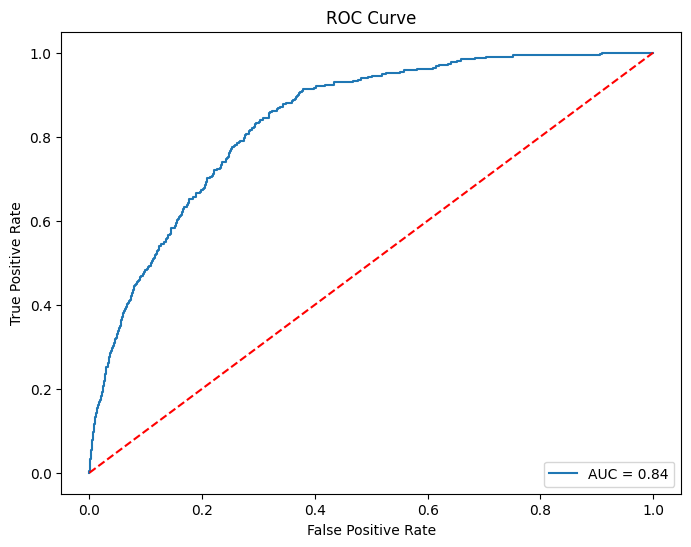

Confusion Matrix:
[[14696  6108]
 [   54   257]]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

# Step 1: Handle missing values
df['default'] = df['default'].replace('NA', np.nan)  # Replace 'NA' with NaN
df = df.dropna(subset=['default'])  # Drop rows where 'default' is NaN

# Step 2: Define Features (X) and Target (y)
X = df.drop(columns=['userid', 'default','acct_incoming_debt_vs_paid_0_24m','acct_status','acct_worst_status_0_3m','acct_worst_status_12_24m','acct_worst_status_3_6m','acct_worst_status_6_12m','avg_payment_span_0_12m','avg_payment_span_0_3m','num_active_div_by_paid_inv_0_12m'])  # Drop irrelevant columns
y = df['default'].astype(int)  # Ensure target variable is numeric (0, 1)

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_categorical = encoder.fit_transform(X[categorical_cols])
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
    X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

# Step 3: Check class distribution
print("Class distribution before splitting:")
print(y.value_counts())

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Drop rows with missing values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Step 5: Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_dropped, y_train_dropped)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Step 6: Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Step 7: Make Predictions
y_pred = log_reg.predict(X_test_dropped)
y_pred_prob = log_reg.predict_proba(X_test_dropped)[:, 1]  # Predicted probabilities for class 1

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test_dropped, y_pred)
precision = precision_score(y_test_dropped, y_pred)
recall = recall_score(y_test_dropped, y_pred)
f1 = f1_score(y_test_dropped, y_pred)
auc_roc = roc_auc_score(y_test_dropped, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Step 9: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_dropped, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Step 10: Display confusion matrix
conf_matrix = confusion_matrix(y_test_dropped, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Class distribution before splitting:
default
0    88688
1     1288
Name: count, dtype: int64
Class distribution after SMOTE:
default
0    62081
1    62081
Name: count, dtype: int64
Accuracy: 0.70
Precision: 0.03
Recall: 0.70
F1 Score: 0.06
AUC-ROC: 0.76


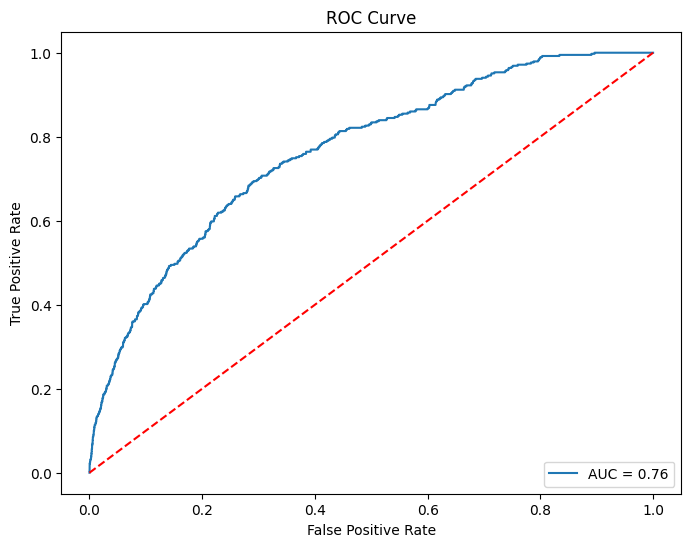

Confusion Matrix:
[[18549  8058]
 [  115   271]]
Confusion Matrix:
[[18549  8058]
 [  115   271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     26607
           1       0.03      0.70      0.06       386

    accuracy                           0.70     26993
   macro avg       0.51      0.70      0.44     26993
weighted avg       0.98      0.70      0.81     26993



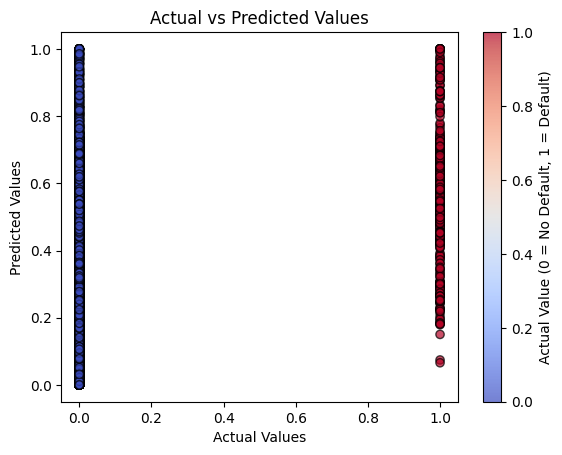

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans  # Importing KMeans for clustering
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values

# Step 1: Handle missing values in the 'default' column
df['default'] = df['default'].replace('NA', np.nan)  # Replace 'NA' with NaN
df = df.dropna(subset=['default'])  # Drop rows where 'default' is NaN

# Step 2: Define Features (X) and Target (y)
X = df.drop(columns=['userid', 'default','acct_incoming_debt_vs_paid_0_24m','acct_status','acct_worst_status_0_3m','acct_worst_status_12_24m','acct_worst_status_3_6m','acct_worst_status_6_12m','avg_payment_span_0_12m','avg_payment_span_0_3m','num_active_div_by_paid_inv_0_12m'])  # Drop irrelevant columns
y = df['default'].astype(int)  # Ensure target variable is numeric (0, 1)

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_categorical = encoder.fit_transform(X[categorical_cols])
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
    X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

# Step 3: Handle missing values in the features using imputation
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for numerical features
X_imputed = imputer.fit_transform(X)

# Step 4: Apply Clustering (e.g., K-Means) and add cluster labels to features
kmeans = KMeans(n_clusters=3, random_state=42)
X_imputed_with_clusters = X_imputed.copy()
X_imputed_with_clusters = pd.DataFrame(X_imputed_with_clusters)  # Convert back to DataFrame
X_imputed_with_clusters['cluster'] = kmeans.fit_predict(X_imputed_with_clusters)

# Step 5: Check class distribution
print("Class distribution before splitting:")
print(y.value_counts())

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_with_clusters, y, test_size=0.3, random_state=42, stratify=y)

# Drop rows with missing values in train and test sets
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Ensure column names are strings (important for SMOTE)
X_train_dropped.columns = X_train_dropped.columns.astype(str)
X_test_dropped.columns = X_test_dropped.columns.astype(str)

# Step 7: Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_dropped, y_train_dropped)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Step 8: Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Step 9: Make Predictions
y_pred = log_reg.predict(X_test_dropped)
y_pred_prob = log_reg.predict_proba(X_test_dropped)[:, 1]  # Predicted probabilities for class 1

# Step 10: Evaluate the Model
accuracy = accuracy_score(y_test_dropped, y_pred)
precision = precision_score(y_test_dropped, y_pred)
recall = recall_score(y_test_dropped, y_pred)
f1 = f1_score(y_test_dropped, y_pred)
auc_roc = roc_auc_score(y_test_dropped, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Step 11: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_dropped, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Step 12: Display confusion matrix
conf_matrix = confusion_matrix(y_test_dropped, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
print(f"Confusion Matrix:\n{confusion_matrix(y_test_dropped, y_pred)}")

# Classification Report
print(f"Classification Report:\n{classification_report(y_test_dropped, y_pred)}")

plt.scatter(y_test_dropped, y_pred_prob, c=y_test_dropped, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.colorbar(label="Actual Value (0 = No Default, 1 = Default)")
plt.show()


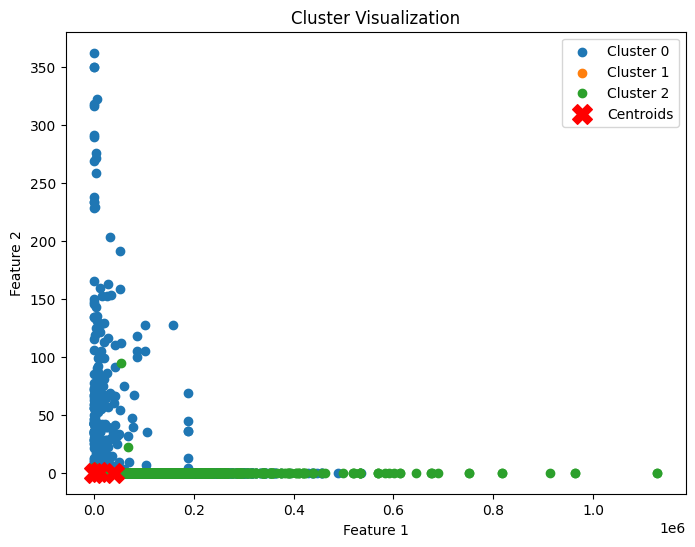

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans  # Importing KMeans for clustering
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_points = X_imputed_with_clusters[X_imputed_with_clusters['cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


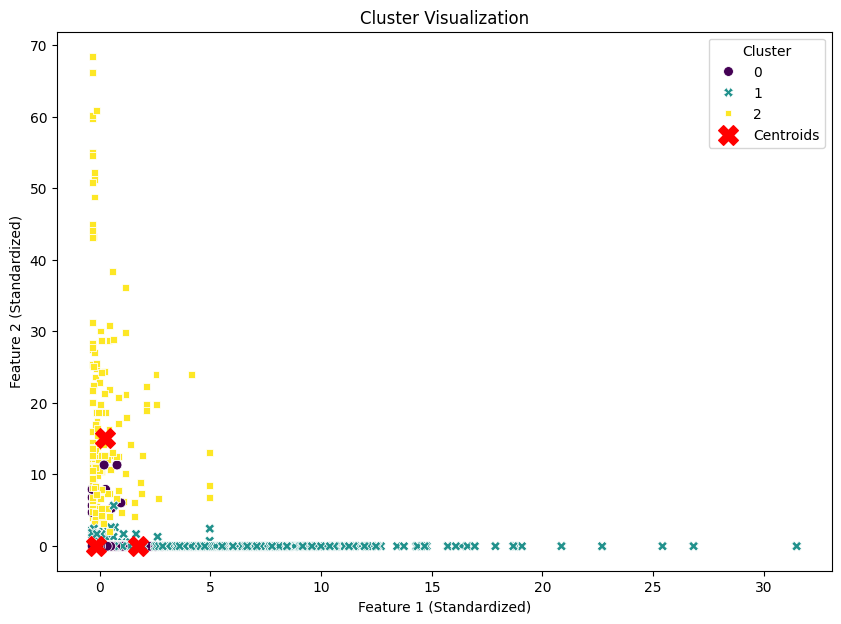

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical features for clustering
selected_features = [
    'acct_amt_added_12_24m',
    'acct_days_in_dc_12_24m',
    'acct_days_in_rem_12_24m',
    'acct_days_in_term_12_24m',
    'age',
    'max_paid_inv_0_12m',
    'sum_paid_inv_0_12m'
]

# Filter the dataset for the selected features
clustering_data = df[selected_features]

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
clustering_data_imputed = imputer.fit_transform(clustering_data)

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data_imputed)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the data
df['cluster'] = clusters

# Visualize the clusters using the first two features
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=clustering_data_scaled[:, 0],
    y=clustering_data_scaled[:, 1],
    hue=clusters,
    palette='viridis',
    style=clusters,
    s=50
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster', loc='upper right')
plt.show()


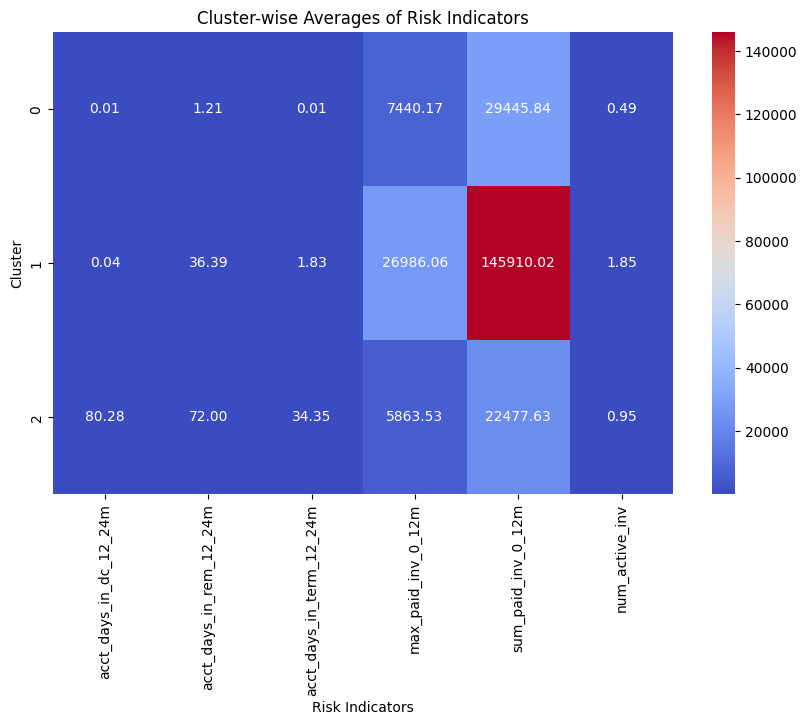

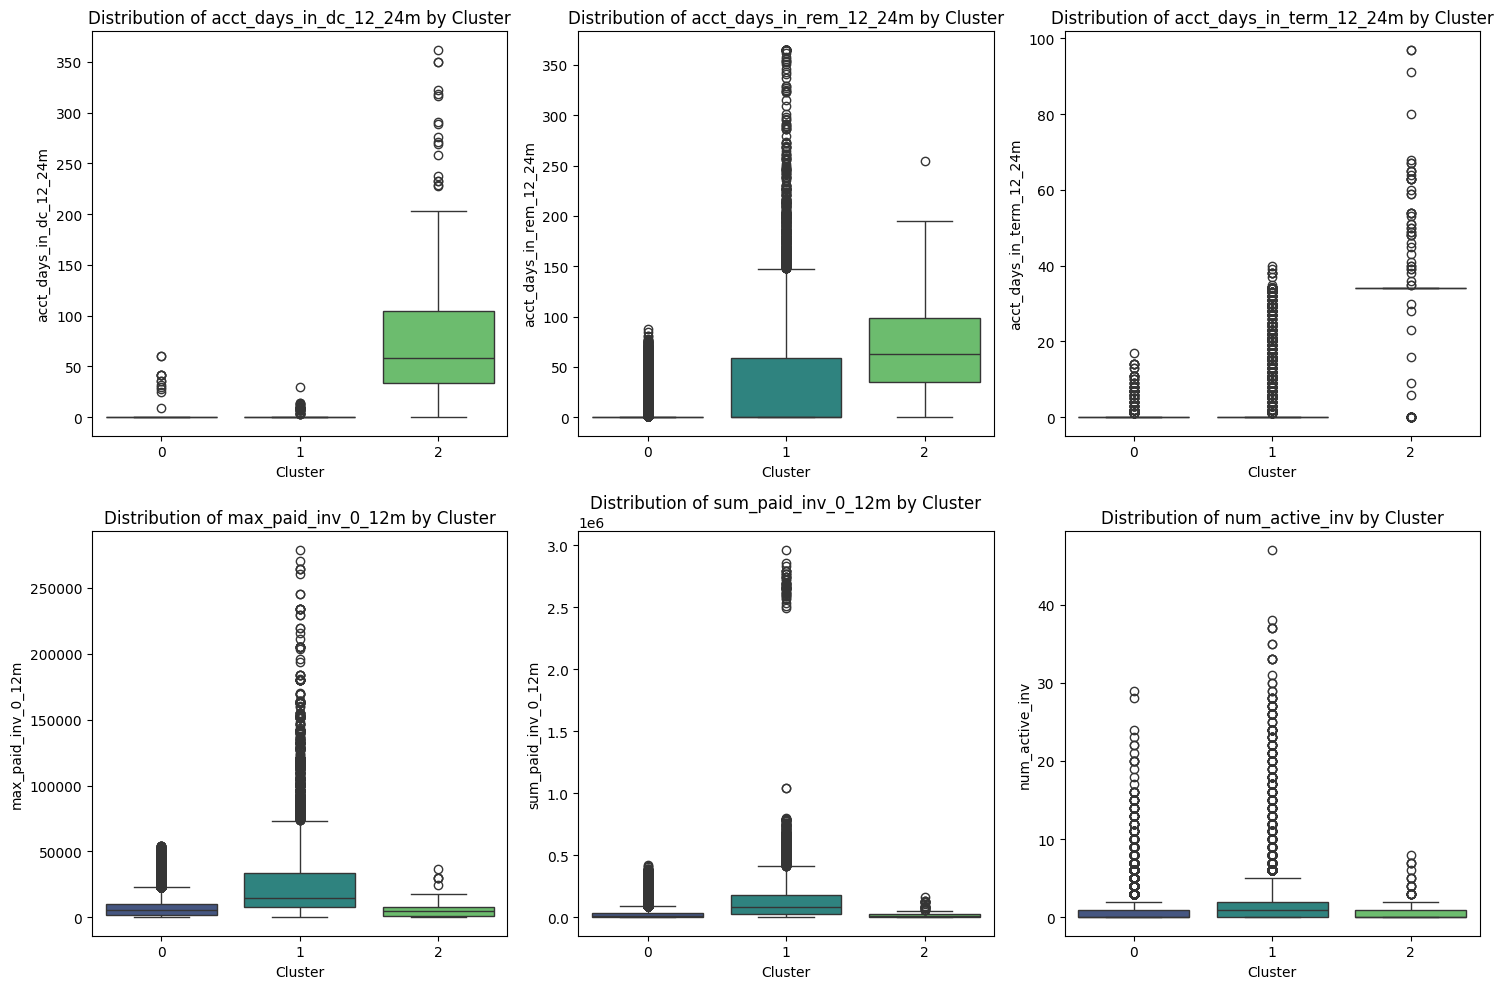

,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,max_paid_inv_0_12m,sum_paid_inv_0_12m,num_active_inv,Cluster Size
cluster,,,,,,,
0,0.00684,1.21278,0.00832,7440.16900,29445.83649,0.48902,81180
1,0.03510,36.38873,1.83307,26986.05620,145910.01527,1.84704,8591
2,80.28293,72.00000,34.34634,5863.52542,22477.63277,0.95480,205


In [25]:
# Calculate cluster-wise averages of key risk indicators
risk_features = [
    'acct_days_in_dc_12_24m',
    'acct_days_in_rem_12_24m',
    'acct_days_in_term_12_24m',
    'max_paid_inv_0_12m',
    'sum_paid_inv_0_12m',
    'num_active_inv'
]
cluster_summary = df.groupby('cluster')[risk_features].mean()

# Add cluster sizes for context
cluster_summary['Cluster Size'] = df['cluster'].value_counts()

# Visualize the risk indicators using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary[risk_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster-wise Averages of Risk Indicators")
plt.xlabel("Risk Indicators")
plt.ylabel("Cluster")
plt.show()

# Visualize distributions of risk indicators across clusters using box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(risk_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['cluster'], y=df[feature], palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel("Cluster")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Display cluster summary data for analysis
cluster_summary


In [26]:
# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Train the model
lda_model.fit(X_train_smote, y_train_smote)

# Make predictions on the train and test set
y_pred_train = lda_model.predict(X_train_smote)
y_pred_test = lda_model.predict(X_test_dropped)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test_dropped, y_pred_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Confusion Matrix
print(f"Confusion Matrix:\n{confusion_matrix(y_test_dropped, y_pred_test)}")

# Classification Report
print(f"Classification Report:\n{classification_report(y_test_dropped, y_pred_test)}")

Train Accuracy: 0.7717900807010196
Test Accuracy: 0.7437483792094247
Confusion Matrix:
[[19793  6814]
 [  103   283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     26607
           1       0.04      0.73      0.08       386

    accuracy                           0.74     26993
   macro avg       0.52      0.74      0.46     26993
weighted avg       0.98      0.74      0.84     26993



In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_dropped)

# Evaluate the model performance
accuracy = accuracy_score(y_test_dropped, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_dropped, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report (precision, recall, F1-score)
class_report = classification_report(y_test_dropped, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.3926
Confusion Matrix:
[[10252 16355]
 [   40   346]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56     26607
           1       0.02      0.90      0.04       386

    accuracy                           0.39     26993
   macro avg       0.51      0.64      0.30     26993
weighted avg       0.98      0.39      0.55     26993



Accuracy: 0.9355
Confusion Matrix:
[[25124  1483]
 [  258   128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     26607
           1       0.08      0.33      0.13       386

    accuracy                           0.94     26993
   macro avg       0.53      0.64      0.55     26993
weighted avg       0.98      0.94      0.95     26993

AUC: 0.8346


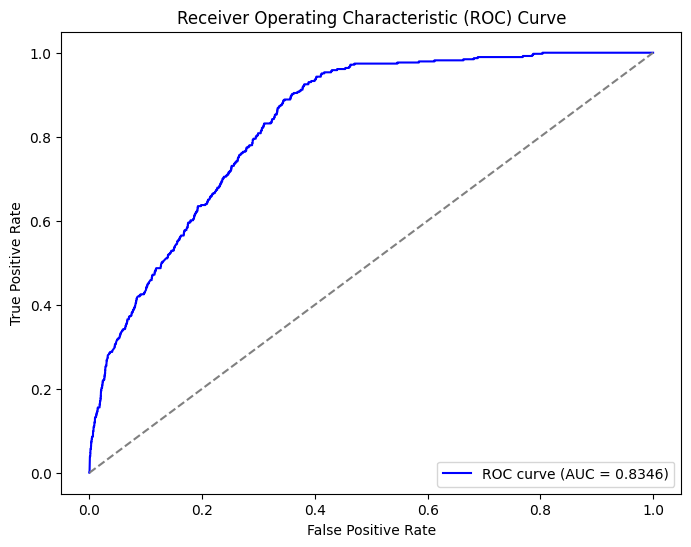

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict the labels for the test set
y_pred = rf_model.predict(X_test_dropped)

# Accuracy score
accuracy = accuracy_score(y_test_dropped, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_dropped, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report (precision, recall, f1-score)
class_report = classification_report(y_test_dropped, y_pred)
print('Classification Report:')
print(class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_dropped, rf_model.predict_proba(X_test_dropped)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [29]:
pip install xgboost

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train and y_train are your features and target variables respectively

# Split the dataset (if you haven't already done so)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_model.predict(X_test_dropped)

# Evaluate the model
accuracy = accuracy_score(y_test_dropped, y_pred)
conf_matrix = confusion_matrix(y_test_dropped, y_pred)
class_report = classification_report(y_test_dropped, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# If you want to evaluate the AUC (Area Under Curve) for binary classification:
from sklearn.metrics import roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test_dropped)[:, 1]  # Get probabilities for the positive class
auc = roc_auc_score(y_test_dropped, y_pred_proba)
print(f"AUC: {auc}")


Accuracy: 0.9792168339939984
Confusion Matrix:
[[26388   219]
 [  342    44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26607
           1       0.17      0.11      0.14       386

    accuracy                           0.98     26993
   macro avg       0.58      0.55      0.56     26993
weighted avg       0.98      0.98      0.98     26993

AUC: 0.8294873899521162


Best Number of Boosting Rounds: 200
Accuracy: 0.8175082428777831
Confusion Matrix:
[[21843  4764]
 [  162   224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     26607
           1       0.04      0.58      0.08       386

    accuracy                           0.82     26993
   macro avg       0.52      0.70      0.49     26993
weighted avg       0.98      0.82      0.89     26993

AUC: 0.8265662976609647


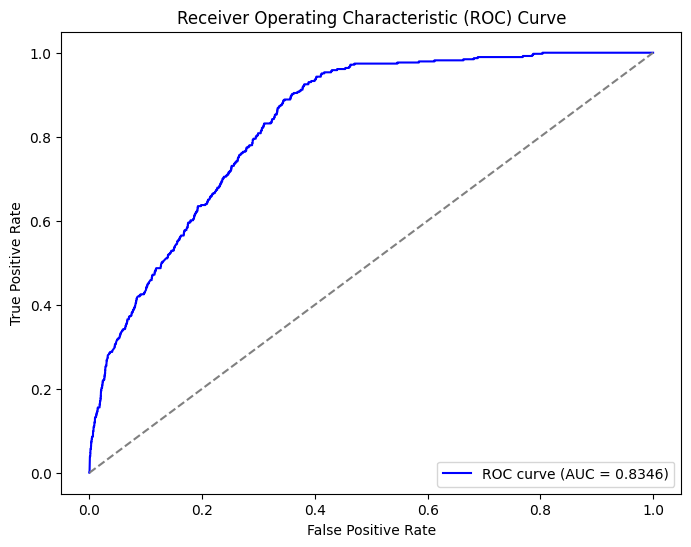

In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)

# Set hyperparameter space
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'scale_pos_weight': 20,
}

# Perform cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=3,
    metrics="auc",
    as_pandas=True,
    seed=42
)

# Get the best number of boosting rounds
best_num_boost_round = cv_results['test-auc-mean'].idxmax() + 1
print("Best Number of Boosting Rounds:", best_num_boost_round)

# Train the final model
final_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_round
)

# Create a DMatrix for the test data
dtest = xgb.DMatrix(X_test_dropped, label=y_test_dropped)

# Make predictions
y_pred_proba = final_model.predict(dtest)  # Get predicted probabilities
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test_dropped, y_pred)
conf_matrix = confusion_matrix(y_test_dropped, y_pred)
class_report = classification_report(y_test_dropped, y_pred)
auc = roc_auc_score(y_test_dropped, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"AUC: {auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 99%|===================| 26706/26993 [01:03<00:00]       

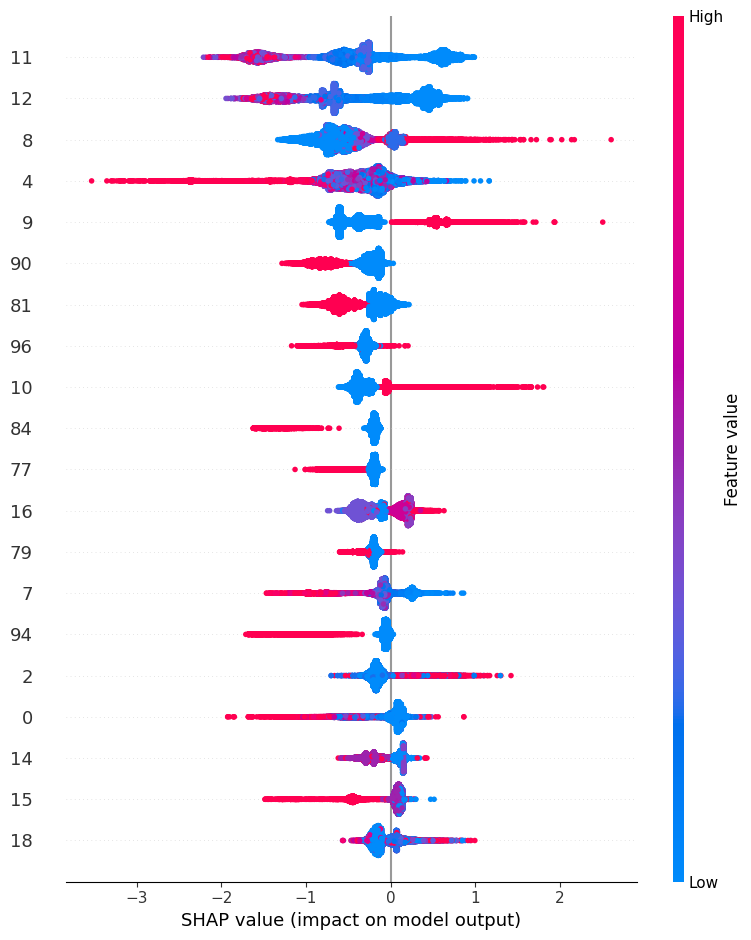


SHAP Feature Importance:
    Feature  Importance
11      11     0.70486
12      12     0.65871
8        8     0.56389
4        4     0.44935
9        9     0.44113
90      90     0.42651
81      81     0.34414
96      96     0.33785
10      10     0.32597
84      84     0.27524

Top 10 Most Important Features:
 ['11', '12', '8', '4', '9', '90', '81', '96', '10', '84']


In [32]:
import shap

# Explain the XGBoost model
explainer = shap.Explainer(xgb_model, X_train_smote)
shap_values = explainer(X_test_dropped)

# Summary Plot
shap.summary_plot(shap_values, X_test_dropped)

# Feature Importance based on mean SHAP values
shap_importance = pd.DataFrame({'Feature': X_test_dropped.columns, 'Importance': abs(shap_values.values).mean(axis=0)})
shap_importance = shap_importance.sort_values(by='Importance', ascending=False)

print("\nSHAP Feature Importance:\n", shap_importance.head(10))

# Sort by importance
shap_importance = shap_importance.sort_values(by='Importance', ascending=False)

# Get the top 10 feature names
top_10_features = shap_importance['Feature'].iloc[:10].tolist()

print("\nTop 10 Most Important Features:\n", top_10_features)

In [46]:
print("SHAP Values Shape:", shap_values.values.shape)
print("Number of Features in X_train_smote:", len(X_train_smote.columns))
print("Feature Names in X_train_smote:", list(X_train_smote.columns)[:20])  # Print first 20 features

# Compute SHAP feature importance
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Print first 10 raw SHAP importance values
print("Raw SHAP Importance (Before Sorting):", shap_importance[:10])

# Extract feature names directly from X_train_smote
feature_names = np.array(X_train_smote.columns)  # Convert to NumPy array to ensure proper indexing

# Ensure length matches
if len(feature_names) != len(shap_importance):
    print("Mismatch Found!")
    print(f"Feature Names Length: {len(feature_names)}")
    print(f"SHAP Importance Length: {len(shap_importance)}")
    raise ValueError("Feature names and SHAP importance values are mismatched!")

# Create DataFrame for ranking
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': shap_importance})

# Sort by SHAP importance
feature_importance_df = feature_importance_df.sort_values(by='SHAP Importance', ascending=False)

# Extract correct top 10 feature names
top_10_features = feature_importance_df['Feature'].head(10).tolist()

# Print the corrected top 10 feature names
print("✅ Corrected Top 10 Most Important Features:")
print(top_10_features)



SHAP Values Shape: (26993, 99)
Number of Features in X_train_smote: 99
Feature Names in X_train_smote: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
Raw SHAP Importance (Before Sorting): [0.17624256 0.1404611  0.19471087 0.03251276 0.449351   0.05724755
 0.14167618 0.20483468 0.56389401 0.44113342]
✅ Corrected Top 10 Most Important Features:
['11', '12', '8', '4', '9', '90', '81', '96', '10', '84']


In [58]:
original_features = list(X.columns)  # Features before train-test split
processed_features = list(X_train_smote.columns)  # Features in final dataset

# Find missing feature(s)
missing_features = list(set(original_features) - set(processed_features))
extra_features = list(set(processed_features) - set(original_features))

print(f"❌ Missing Features: {missing_features}")
print(f"🛑 Extra Features: {extra_features}")

# Ensure SHAP Importance matches Feature Names
shap_importance = shap_importance[:len(feature_names)]  # Trim extra value if needed

print(f"✅ Fixed Feature Names Length: {len(feature_names)}")
print(f"✅ Fixed SHAP Importance Length: {len(shap_importance)}")

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': shap_importance})

# Sort & Extract Top 10
feature_importance_df = feature_importance_df.sort_values(by='SHAP Importance', ascending=False)
top_10_features = feature_importance_df['Feature'].head(10).tolist()

print("✅ Corrected Top 10 Most Important Features:")
print(top_10_features)


❌ Missing Features: []
🛑 Extra Features: []
✅ Fixed Feature Names Length: 98
✅ Fixed SHAP Importance Length: 98
✅ Corrected Top 10 Most Important Features:
['merchant_category_Video Games & Related accessories', 'merchant_category_Food & Beverage', 'merchant_group_Leisure', 'merchant_category_Furniture', 'merchant_category_Body & Hair Care', 'merchant_category_Plants & Flowers', 'merchant_category_Wheels & Tires', 'merchant_category_Travel services', 'merchant_category_Diversified Health & Beauty products', 'merchant_category_Tools & Home improvement']
